# Exploratory Data Analysis of Shark Tank Data<br>
### Introduction
Predicting whether a company on ABC's popular program "Shark Tank" accepted an offer is our goal. Entrepreneurs present their ideas to a panel of investors on the show Shark Tank, which debuted in 2009. In exchange for stock, the entrepreneur requests that the investors invest money. Investors have two options: they either decide not to invest or make an offer (usually with less enticing terms than those put forth by the entrepreneur). 
This dataset contains the information of all episodes from Season 1 to Season 9. The target column is 'Deal_Yes'. Link to the dataset: https://www.kaggle.com/competitions/ban-502-shark-summer-2021/data .

In [1]:
# importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shark_student.csv') # importing the dataset

In [3]:
df

,Unnamed: 0,Company,SeasonEpisode,ReceiveOffer,RejectOffer,Deal_Yes,Deal_No,Number of Presenters,Eth1,Eth2,...,EquityRequested,ImpliedValuationRequested,BarbaraCorcoran,MarkCuban,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest
0,1,Wispots,Shark.Tank.S01E01,0,0,0,1,1,2,0,...,0.10,12000000.0,1,0,0,1,1,1,1,0
1,2,CollegeFoxesPackingBoxes,Shark.Tank.S01E01,1,1,0,1,2,4,2,...,0.25,1000000.0,1,0,0,1,1,1,1,0
2,3,Mr.TodsPieFactory,Shark.Tank.S01E01,1,0,1,0,1,1,0,...,0.10,4600000.0,1,0,0,1,1,1,1,0
3,4,AvatheElephant,Shark.Tank.S01E01,1,0,1,0,1,2,0,...,0.15,333333.0,1,0,0,1,1,1,1,0
4,5,AttachNoted,Shark.Tank.S01E02,0,0,0,1,1,3,0,...,0.20,500000.0,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,Avocaderia,Shark.Tank.S09E22,1,0,1,0,1,2,0,...,0.10,3000000.0,1,1,1,1,0,0,0,1
547,548,HugosAmazingTape,Shark.Tank.S09E23,1,0,1,0,2,2,2,...,0.50,100000.0,1,1,1,1,0,1,0,0
548,549,LaceYourFace,Shark.Tank.S09E24,1,0,1,0,2,2,3,...,0.10,3500000.0,0,1,1,1,1,0,0,1
549,550,Bermies,Shark.Tank.S09E24,0,0,0,1,1,2,0,...,0.20,1000000.0,0,1,1,1,1,0,0,1


In [4]:
# calculating the total  numbers of Male pitchers, Female pitchers (and thus total pitchers)
df['Total_Males'] = df['Male1'] + df['Male2'] +df['Male3'] +df['Male4'] 
df['Total_Females'] = df['Female1'] + df['Female2'] +df['Female3'] +df['Female4'] 
df['Total_Pitchers'] = df['Total_Females'] + df['Total_Males']

In [5]:
df2 = df.copy() # making a copy of the original dataframe to do further operations

In [6]:
df2.columns # checking all the column names

Index(['Unnamed: 0', 'Company', 'SeasonEpisode', 'ReceiveOffer', 'RejectOffer',
       'Deal_Yes', 'Deal_No', 'Number of Presenters', 'Eth1', 'Eth2', 'Eth3',
       'Eth4', 'Eth5', 'Male1', 'Male2', 'Male3', 'Male4', 'Female1',
       'Female2', 'Female3', 'Female4', 'Novelties', 'Health / Wellness',
       'Food and Beverage', 'Business Services', 'Lifestyle / Home',
       'Software / Tech', 'Children / Education', 'Automotive',
       'Fashion / Beauty', 'Media / Entertainment',
       'Fitness / Sports / Outdoors', 'Pet Products', 'Travel',
       'Green/CleanTech', 'Uncertain / Other', 'MalePresenter',
       'FemalePresenter', 'MixedGenderPresenters', 'CompanyState',
       'AmountRequested', 'EquityRequested', 'ImpliedValuationRequested',
       'BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec',
       'DaymondJohn', 'KevinOLeary', 'KevinHarrington', 'Guest', 'Total_Males',
       'Total_Females', 'Total_Pitchers'],
      dtype='object')

In [7]:
df2.drop(['Unnamed: 0','Deal_No','Female1','Female2', 'Female3', 'Female4'],axis=1,inplace=True) # removing the redundant columns

In [8]:
df2

,Company,SeasonEpisode,ReceiveOffer,RejectOffer,Deal_Yes,Number of Presenters,Eth1,Eth2,Eth3,Eth4,...,MarkCuban,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest,Total_Males,Total_Females,Total_Pitchers
0,Wispots,Shark.Tank.S01E01,0,0,0,1,2,0,0,0,...,0,0,1,1,1,1,0,1,0,1
1,CollegeFoxesPackingBoxes,Shark.Tank.S01E01,1,1,0,2,4,2,0,0,...,0,0,1,1,1,1,0,2,0,2
2,Mr.TodsPieFactory,Shark.Tank.S01E01,1,0,1,1,1,0,0,0,...,0,0,1,1,1,1,0,1,0,1
3,AvatheElephant,Shark.Tank.S01E01,1,0,1,1,2,0,0,0,...,0,0,1,1,1,1,0,0,1,1
4,AttachNoted,Shark.Tank.S01E02,0,0,0,1,3,0,0,0,...,0,0,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Avocaderia,Shark.Tank.S09E22,1,0,1,1,2,0,0,0,...,1,1,1,0,0,0,1,1,0,1
547,HugosAmazingTape,Shark.Tank.S09E23,1,0,1,2,2,2,0,0,...,1,1,1,0,1,0,0,0,2,2
548,LaceYourFace,Shark.Tank.S09E24,1,0,1,2,2,3,0,0,...,1,1,1,1,0,0,1,0,2,2
549,Bermies,Shark.Tank.S09E24,0,0,0,1,2,0,0,0,...,1,1,1,1,0,0,1,1,0,1


In [9]:
df2['SeasonEpisode'] = df2['SeasonEpisode'].apply(lambda x: x.split('.')[-1]) # Slicing out only the season number and episode number components from SeasonEpisode column

In [10]:
df2['Season'] = df2['SeasonEpisode'].apply(lambda x: int(x[1:3])) # Slicing out the season number

In [11]:
df2

,Company,SeasonEpisode,ReceiveOffer,RejectOffer,Deal_Yes,Number of Presenters,Eth1,Eth2,Eth3,Eth4,...,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest,Total_Males,Total_Females,Total_Pitchers,Season
0,Wispots,S01E01,0,0,0,1,2,0,0,0,...,0,1,1,1,1,0,1,0,1,1
1,CollegeFoxesPackingBoxes,S01E01,1,1,0,2,4,2,0,0,...,0,1,1,1,1,0,2,0,2,1
2,Mr.TodsPieFactory,S01E01,1,0,1,1,1,0,0,0,...,0,1,1,1,1,0,1,0,1,1
3,AvatheElephant,S01E01,1,0,1,1,2,0,0,0,...,0,1,1,1,1,0,0,1,1,1
4,AttachNoted,S01E02,0,0,0,1,3,0,0,0,...,0,1,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Avocaderia,S09E22,1,0,1,1,2,0,0,0,...,1,1,0,0,0,1,1,0,1,9
547,HugosAmazingTape,S09E23,1,0,1,2,2,2,0,0,...,1,1,0,1,0,0,0,2,2,9
548,LaceYourFace,S09E24,1,0,1,2,2,3,0,0,...,1,1,1,0,0,1,0,2,2,9
549,Bermies,S09E24,0,0,0,1,2,0,0,0,...,1,1,1,0,0,1,1,0,1,9


In [12]:
df2.drop('SeasonEpisode',axis=1,inplace=True) # dropping off redundant column

In [13]:
df2.drop('Company',axis=1,inplace=True) # dropping off redundant column

In [14]:
df2

,ReceiveOffer,RejectOffer,Deal_Yes,Number of Presenters,Eth1,Eth2,Eth3,Eth4,Eth5,Male1,...,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest,Total_Males,Total_Females,Total_Pitchers,Season
0,0,0,0,1,2,0,0,0,0,1,...,0,1,1,1,1,0,1,0,1,1
1,1,1,0,2,4,2,0,0,0,1,...,0,1,1,1,1,0,2,0,2,1
2,1,0,1,1,1,0,0,0,0,1,...,0,1,1,1,1,0,1,0,1,1
3,1,0,1,1,2,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
4,0,0,0,1,3,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,0,1,1,2,0,0,0,0,1,...,1,1,0,0,0,1,1,0,1,9
547,1,0,1,2,2,2,0,0,0,0,...,1,1,0,1,0,0,0,2,2,9
548,1,0,1,2,2,3,0,0,0,0,...,1,1,1,0,0,1,0,2,2,9
549,0,0,0,1,2,0,0,0,0,1,...,1,1,1,0,0,1,1,0,1,9


In [15]:
test = pd.read_csv('shark_competition.csv') # importing the test data

In [16]:
test.columns # checking the columns of test dataset

Index(['Unnamed: 0', 'Company', 'SeasonEpisode', 'Number of Presenters',
       'Eth1', 'Eth2', 'Eth3', 'Eth4', 'Eth5', 'Male1', 'Male2', 'Male3',
       'Male4', 'Female1', 'Female2', 'Female3', 'Female4', 'Novelties',
       'Health / Wellness', 'Food and Beverage', 'Business Services',
       'Lifestyle / Home', 'Software / Tech', 'Children / Education',
       'Automotive', 'Fashion / Beauty', 'Media / Entertainment',
       'Fitness / Sports / Outdoors', 'Pet Products', 'Travel',
       'Green/CleanTech', 'Uncertain / Other', 'MalePresenter',
       'FemalePresenter', 'MixedGenderPresenters', 'CompanyState',
       'AmountRequested', 'EquityRequested', 'ImpliedValuationRequested',
       'BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec',
       'DaymondJohn', 'KevinOLeary', 'KevinHarrington', 'Guest'],
      dtype='object')

In [17]:
df.columns # checking the columns of train dataset

Index(['Unnamed: 0', 'Company', 'SeasonEpisode', 'ReceiveOffer', 'RejectOffer',
       'Deal_Yes', 'Deal_No', 'Number of Presenters', 'Eth1', 'Eth2', 'Eth3',
       'Eth4', 'Eth5', 'Male1', 'Male2', 'Male3', 'Male4', 'Female1',
       'Female2', 'Female3', 'Female4', 'Novelties', 'Health / Wellness',
       'Food and Beverage', 'Business Services', 'Lifestyle / Home',
       'Software / Tech', 'Children / Education', 'Automotive',
       'Fashion / Beauty', 'Media / Entertainment',
       'Fitness / Sports / Outdoors', 'Pet Products', 'Travel',
       'Green/CleanTech', 'Uncertain / Other', 'MalePresenter',
       'FemalePresenter', 'MixedGenderPresenters', 'CompanyState',
       'AmountRequested', 'EquityRequested', 'ImpliedValuationRequested',
       'BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec',
       'DaymondJohn', 'KevinOLeary', 'KevinHarrington', 'Guest', 'Total_Males',
       'Total_Females', 'Total_Pitchers'],
      dtype='object')

In [18]:
# checking all those which are not present in test set but are there in train set
for i in df.columns:
    if i not in test.columns:
        print(i)

ReceiveOffer
RejectOffer
Deal_Yes
Deal_No
Total_Males
Total_Females
Total_Pitchers


#### We need to take out Recieve Offer and Reject Offer from train set as they are redundant

### Now let's check the success rate

In [19]:
df2['Deal_Yes'].value_counts() # checking the value count of the target column

1    301
0    250
Name: Deal_Yes, dtype: int64

In [20]:
100 * df2['Deal_Yes'].value_counts()/len(df2) # checking the proportion of Deal Yes == 1

1    54.627949
0    45.372051
Name: Deal_Yes, dtype: float64

In [21]:
df2_success = df2[df2['Deal_Yes']==1] # creating a seperate dataframe of success rate

In [22]:
df2_success

,ReceiveOffer,RejectOffer,Deal_Yes,Number of Presenters,Eth1,Eth2,Eth3,Eth4,Eth5,Male1,...,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest,Total_Males,Total_Females,Total_Pitchers,Season
2,1,0,1,1,1,0,0,0,0,1,...,0,1,1,1,1,0,1,0,1,1
3,1,0,1,1,2,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
6,1,0,1,1,2,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
8,1,0,1,1,2,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
10,1,0,1,1,1,0,0,0,0,1,...,0,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,0,1,2,2,2,0,0,0,1,...,1,1,0,0,0,1,2,0,2,9
546,1,0,1,1,2,0,0,0,0,1,...,1,1,0,0,0,1,1,0,1,9
547,1,0,1,2,2,2,0,0,0,0,...,1,1,0,1,0,0,0,2,2,9
548,1,0,1,2,2,3,0,0,0,0,...,1,1,1,0,0,1,0,2,2,9


In [23]:
df2_success['Total_Males'].value_counts() # Checking the value counts of total male presenters for alll the successful Deals

1    152
0     76
2     65
3      8
Name: Total_Males, dtype: int64

In [24]:
df2_success['Total_Females'].value_counts() # Checking the value counts of total female presenters for alll the successful Deals

0    167
1    103
2     29
3      2
Name: Total_Females, dtype: int64

In [25]:
df2_success['MalePresenter'].value_counts() # Checking the value counts of whether there was any Male presenter in all of the successful deals

1    169
0    132
Name: MalePresenter, dtype: int64

In [26]:
df2_success['FemalePresenter'].value_counts() # Checking the value counts of whether there was any Female presenter in all of the successful deals

0    225
1     76
Name: FemalePresenter, dtype: int64

In [27]:
df2_success['MixedGenderPresenters'].value_counts() # Checking the value counts of whether there were Mixed Gender Presenters in all of the successful deals

0    245
1     56
Name: MixedGenderPresenters, dtype: int64

In [28]:
df2_success['Total_Pitchers'].value_counts() # Checking the value counts of total number of pitchers in all of the successful deals

1    144
2    143
3     13
4      1
Name: Total_Pitchers, dtype: int64

In [29]:
pd.Series(df2_success['Total_Males']/df2_success['Total_Pitchers']).value_counts() # Checking the proprtion of males in the presenter panel in all the successful deals

1.000000    167
0.000000     76
0.500000     53
0.666667      2
0.333333      2
0.250000      1
dtype: int64

## Checking Success Ratio (Deal_Yes==1) for all combinations of Male and Female Presenters

In [30]:
# Checking Success Ratio (Deal_Yes==1) for all combinations of Male and Female Presenters
n = list(df2_success['Total_Males'].unique())
for i in n:
    for j in n:
        print(f"When Males = {i}  and Females = {j}, then", end='\n')
        print(100 * df2[(df2['Total_Males']==i) & (df2['Total_Females']==j)]['Deal_Yes'].value_counts()/len(df2[(df2['Total_Males']==i) & (df2['Total_Females']==j)]))
        print('\n')

When Males = 1  and Females = 1, then
1    62.352941
0    37.647059
Name: Deal_Yes, dtype: float64


When Males = 1  and Females = 0, then
0    51.515152
1    48.484848
Name: Deal_Yes, dtype: float64


When Males = 1  and Females = 2, then
1    66.666667
0    33.333333
Name: Deal_Yes, dtype: float64


When Males = 1  and Females = 3, then
1    100.0
Name: Deal_Yes, dtype: float64


When Males = 0  and Females = 1, then
1    55.172414
0    44.827586
Name: Deal_Yes, dtype: float64


When Males = 0  and Females = 0, then
Series([], Name: Deal_Yes, dtype: float64)


When Males = 0  and Females = 2, then
1    69.230769
0    30.769231
Name: Deal_Yes, dtype: float64


When Males = 0  and Females = 3, then
0    75.0
1    25.0
Name: Deal_Yes, dtype: float64


When Males = 2  and Females = 1, then
1    66.666667
0    33.333333
Name: Deal_Yes, dtype: float64


When Males = 2  and Females = 0, then
1    55.752212
0    44.247788
Name: Deal_Yes, dtype: float64


When Males = 2  and Females = 2, then

In [31]:
df2.groupby(['Total_Males','Total_Females']).count()['Deal_Yes'] # Checking value counts for all combinations of Male and Female Presenters

Total_Males  Total_Females
0            1                 87
             2                 39
             3                  4
             4                  1
1            0                198
             1                 85
             2                  3
             3                  1
2            0                113
             1                  3
3            0                 17
Name: Deal_Yes, dtype: int64

## We'll only consider those categories which have count more than the median (which comes out as 17) counts of all the possible combos of presenters. This will filter out those cases where we get 100% success rate just because the frequency is low. e.g. if there is only 1 combo os say 3 Females and 2 Males and they got a deal then there success rate would be 100%, but that won't be realistic because only one such sample is present.

In [32]:
cat_median = np.median(df2.groupby(['Total_Males','Total_Females']).count()['Deal_Yes'].values) # calculating the median
cat_median

17.0

In [33]:
# Checking value counts for those combinations of Male and Female Presenters which had more than the median of value counts 
df2_success.groupby(['Total_Males','Total_Females']).count()[df2_success.groupby(['Total_Males','Total_Females']).count()['Deal_Yes'] > cat_median]['Deal_Yes']

Total_Males  Total_Females
0            1                48
             2                27
1            0                96
             1                53
2            0                63
Name: Deal_Yes, dtype: int64

In [34]:
100 * df2_success.groupby(['Total_Males','Total_Females']).count()[df2_success.groupby(['Total_Males','Total_Females']).count()['Deal_Yes'] > cat_median]['Deal_Yes']/df2.groupby(['Total_Males','Total_Females']).count()[df2.groupby(['Total_Males','Total_Females']).count()['Deal_Yes'] > cat_median]['Deal_Yes']

Total_Males  Total_Females
0            1                55.172414
             2                69.230769
1            0                48.484848
             1                62.352941
2            0                55.752212
Name: Deal_Yes, dtype: float64

## Seems like number of persons pitching = 2 gives optimal results.
Top 5 Most successful combos:
<ol>
    <li> 0 Male + 2 Females - Success Ratio = 69.23% </li>
    <li> 1 Male + 1 Female - Success Ratio = 62.35% </li>
    <li> 2 Males + 0 Female - Success Ratio = 55.75%</li>
    <li> 0 Male + 1 Female - Success Ratio = 55.17% </li>
    <li> 1 Male + 0 Female - Success Ratio = 48.48% </li>
   
</ol>
    

## Did using 'Novelties' help in "Sealing the Deal"?

In [35]:
df2['Novelties'].value_counts() # checking value counts of those contestants who presented novelty items and those who did not

0    530
1     21
Name: Novelties, dtype: int64

In [36]:
df2_success['Novelties'].value_counts() # checking value counts of those contestants who presented novelty items and those who did not for only succesful deals

0    290
1     11
Name: Novelties, dtype: int64

In [37]:
df2_success.groupby('Novelties').mean()['AmountRequested'] # checking the mean amount of Amount Requested for those with or without Novelty items

Novelties
0    247513.793638
1    160454.545455
Name: AmountRequested, dtype: float64

In [38]:
df2_success.groupby('Novelties').mean()['EquityRequested'] # checking the mean amount of Equity Requested for those with or without Novelty items

Novelties
0    0.150448
1    0.140909
Name: EquityRequested, dtype: float64

### No significant diffence in the Amount and Equity ask of those who offerred novelty items and those who did not

### Let's see the success ratio whether those pitches which used 'Novelty' items had a significant success rate or not

In [39]:
100 * df2_success['Novelties'].value_counts()/df2['Novelties'].value_counts() # Let's see the success ratio whether those pitches which used 'Novelty' items had a significant success rate or not

0    54.716981
1    52.380952
Name: Novelties, dtype: float64

## Seems like using Novelities didn't bring any 'special effects'. They're sharks, can't be convinced easily.

## Now, let's see which sector got the most deals

## We'll only consider those business sectors which have a success count more than the median (which comes out as 12.5 or 13) counts. This will filter out those sectors where we get 100% success rate just because the frequency is low. e.g. in green tech there was only 1 pitch and that got the deal, making a success rate of 100%, but that won't be realistic because only one such sample is present.

In [40]:
df2.columns 

Index(['ReceiveOffer', 'RejectOffer', 'Deal_Yes', 'Number of Presenters',
       'Eth1', 'Eth2', 'Eth3', 'Eth4', 'Eth5', 'Male1', 'Male2', 'Male3',
       'Male4', 'Novelties', 'Health / Wellness', 'Food and Beverage',
       'Business Services', 'Lifestyle / Home', 'Software / Tech',
       'Children / Education', 'Automotive', 'Fashion / Beauty',
       'Media / Entertainment', 'Fitness / Sports / Outdoors', 'Pet Products',
       'Travel', 'Green/CleanTech', 'Uncertain / Other', 'MalePresenter',
       'FemalePresenter', 'MixedGenderPresenters', 'CompanyState',
       'AmountRequested', 'EquityRequested', 'ImpliedValuationRequested',
       'BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec',
       'DaymondJohn', 'KevinOLeary', 'KevinHarrington', 'Guest', 'Total_Males',
       'Total_Females', 'Total_Pitchers', 'Season'],
      dtype='object')

In [41]:
# Making a list of all the Business Sectors 
sectors = ['Health / Wellness', 'Food and Beverage',
       'Business Services', 'Lifestyle / Home', 'Software / Tech',
       'Children / Education', 'Automotive', 'Fashion / Beauty',
       'Media / Entertainment', 'Fitness / Sports / Outdoors', 'Pet Products',
       'Travel', 'Green/CleanTech','Uncertain / Other']

In [42]:
# Checking Which sector was the most successfull 
for i in sectors:
    print(f"Success Rate of Sector : {i}", end='\n')
    print(f"{round(100 * df2_success[i].sum()/df2[i].sum(),2)}%")

Success Rate of Sector : Health / Wellness
58.33%
Success Rate of Sector : Food and Beverage
57.29%
Success Rate of Sector : Business Services
23.33%
Success Rate of Sector : Lifestyle / Home
61.29%
Success Rate of Sector : Software / Tech
58.33%
Success Rate of Sector : Children / Education
68.52%
Success Rate of Sector : Automotive
71.43%
Success Rate of Sector : Fashion / Beauty
48.42%
Success Rate of Sector : Media / Entertainment
48.65%
Success Rate of Sector : Fitness / Sports / Outdoors
54.55%
Success Rate of Sector : Pet Products
61.11%
Success Rate of Sector : Travel
0.0%
Success Rate of Sector : Green/CleanTech
100.0%
Success Rate of Sector : Uncertain / Other
40.0%


### Let's create a dataframe which has sector name, their respective counts, number of successful pitches and then success ratio (number of successful pitches divided by heir respective counts)

In [43]:
# Creating blank lists for counts and successful counts which will be appended with their respective values for each sector
sec_cnts=[]
sec_cnts_success=[]
for i in sectors:
    sec_cnts.append(df2[i].sum())
    sec_cnts_success.append(df2_success[i].sum())

In [44]:
# Creating the dataframe and sorting it by counts 
sec_df = pd.DataFrame({'Sectors': sectors, 'Counts': sec_cnts, 'Success Counts': sec_cnts_success, 'Success Ratio': 100 * np.array(sec_cnts_success)/np.array(sec_cnts)})
sec_df.sort_values('Counts',ascending=False)

,Sectors,Counts,Success Counts,Success Ratio
1,Food and Beverage,96,55,57.291667
7,Fashion / Beauty,95,46,48.421053
3,Lifestyle / Home,93,57,61.290323
9,Fitness / Sports / Outdoors,55,30,54.545455
5,Children / Education,54,37,68.518519
8,Media / Entertainment,37,18,48.648649
2,Business Services,30,7,23.333333
4,Software / Tech,24,14,58.333333
10,Pet Products,18,11,61.111111
0,Health / Wellness,12,7,58.333333


In [45]:
sec_df['Success Counts'].median() # checking the median value

12.5

In [46]:
sec_df_2 = sec_df[sec_df['Success Counts'] > sec_df['Success Counts'].median()] # selecting all those sectors which had more than median success count
sec_df_2

,Sectors,Counts,Success Counts,Success Ratio
1,Food and Beverage,96,55,57.291667
3,Lifestyle / Home,93,57,61.290323
4,Software / Tech,24,14,58.333333
5,Children / Education,54,37,68.518519
7,Fashion / Beauty,95,46,48.421053
8,Media / Entertainment,37,18,48.648649
9,Fitness / Sports / Outdoors,55,30,54.545455


In [239]:
imp_business_sectors = sec_df_2['Sectors'].unique() # Creating a list of all the business sectors which have a higher success count that the median success count

In [47]:
sec_df_2.sort_values('Success Ratio',ascending=False).head(5) # Sorting the dataframe by Success Ratio

,Sectors,Counts,Success Counts,Success Ratio
5,Children / Education,54,37,68.518519
3,Lifestyle / Home,93,57,61.290323
4,Software / Tech,24,14,58.333333
1,Food and Beverage,96,55,57.291667
9,Fitness / Sports / Outdoors,55,30,54.545455


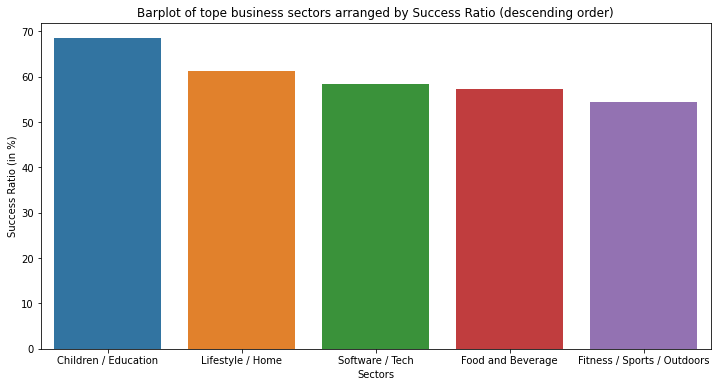

In [317]:
# Barplot of top business sectors arranged by Success Ratio (descending order)
plt.figure(figsize=(12,6))
sns.barplot(data=sec_df_2.sort_values('Success Ratio',ascending=False).head(5) , x='Sectors',y='Success Ratio')
plt.ylabel('Success Ratio (in %)')
plt.title('Barplot of top business sectors arranged by Success Ratio (descending order)')
plt.show();

### Top 5 industry sectors:
<ol>
    <li> Children and Education - Overall Success Ratio: 68.52% </li>
    <li> Lifestyle/Home - Overall Success Ratio: 61.29% </li>
    <li> Software/Tech - Overall Success Ratio: 58.33% </li>
    <li> Food and Beverage - Overall Success Ratio: 57.29% </li>
    <li> Fitness / Sports / Outdoors - Overall Success Ratio: 54.55% </li>
</ol>

## We noticed that area like Fashion/Beauty did not have a high success ratio despite having a high number of pitches, indicating a low success rate. However, Success rate of Children and Education is very high, because giving good, affordable and remote education is the neeed of the hour. Apart from that Lifestyle/Home products have high volumes of usage and are scalable. Software/Tech has the advantage of patenting or copyrighting various algorithms and architecture. And Sectors like Food and Beverage along with Fitness/Sports/Outdoors are evergreen.

### Now let's see the realities of these industries i.e. their Intra-category Success and Failure Rate

### 1) Lifestyle and Home

In [48]:
# Checking the intra-category success proprtion
100 * df2[df2['Lifestyle / Home']==1]['Deal_Yes'].value_counts()/len(df2[df2['Lifestyle / Home']==1])

1    61.290323
0    38.709677
Name: Deal_Yes, dtype: float64

### 2) Food n Beverage

In [49]:
100 * df2[df2['Food and Beverage']==1]['Deal_Yes'].value_counts()/len(df2[df2['Food and Beverage']==1]) # Checking the intra-category success proportion

1    57.291667
0    42.708333
Name: Deal_Yes, dtype: float64

### 3) Fashion and Beauty

In [50]:
100 * df2[df2['Fashion / Beauty']==1]['Deal_Yes'].value_counts()/len(df2[df2['Fashion / Beauty']==1]) # Checking the intra-category success proportion

0    51.578947
1    48.421053
Name: Deal_Yes, dtype: float64

### 4) Children and Education

In [51]:
100 * df2[df2['Children / Education']==1]['Deal_Yes'].value_counts()/len(df2[df2['Children / Education']==1]) # Checking the intra-category success proportion

1    68.518519
0    31.481481
Name: Deal_Yes, dtype: float64

### 5) Fitness Sports and outdoors

In [52]:
100 * df2[df2['Fitness / Sports / Outdoors']==1]['Deal_Yes'].value_counts()/len(df2[df2['Fitness / Sports / Outdoors']==1]) # Checking the intra-category success proportion

1    54.545455
0    45.454545
Name: Deal_Yes, dtype: float64

### 6) Software/tech

In [53]:
100 * df2[df2['Software / Tech']==1]['Deal_Yes'].value_counts()/len(df2[df2['Software / Tech']==1]) # Checking the intra-category success proportion

1    58.333333
0    41.666667
Name: Deal_Yes, dtype: float64

### Looking at every sector's individual success rate (in its own category what was the success rate)

In [54]:
for i in sectors:
    print(f"Sector: {i}",end='\n')
   # print("Intra category Success Ratio")
    print(100 * df2[df2[i]==1]['Deal_Yes'].value_counts()/len(df2[df2[i]==1]))

Sector: Health / Wellness
1    58.333333
0    41.666667
Name: Deal_Yes, dtype: float64
Sector: Food and Beverage
1    57.291667
0    42.708333
Name: Deal_Yes, dtype: float64
Sector: Business Services
0    76.666667
1    23.333333
Name: Deal_Yes, dtype: float64
Sector: Lifestyle / Home
1    61.290323
0    38.709677
Name: Deal_Yes, dtype: float64
Sector: Software / Tech
1    58.333333
0    41.666667
Name: Deal_Yes, dtype: float64
Sector: Children / Education
1    68.518519
0    31.481481
Name: Deal_Yes, dtype: float64
Sector: Automotive
1    71.428571
0    28.571429
Name: Deal_Yes, dtype: float64
Sector: Fashion / Beauty
0    51.578947
1    48.421053
Name: Deal_Yes, dtype: float64
Sector: Media / Entertainment
0    51.351351
1    48.648649
Name: Deal_Yes, dtype: float64
Sector: Fitness / Sports / Outdoors
1    54.545455
0    45.454545
Name: Deal_Yes, dtype: float64
Sector: Pet Products
1    61.111111
0    38.888889
Name: Deal_Yes, dtype: float64
Sector: Travel
0    100.0
Name: Deal_Yes, 

## Fashion/Beauty has the highest Failure Rate

## Let's see the mean and median amount and equity requested for each sector

### Amount Requested

Let's create a dataframe which has the mean and median 'Amount Requested' for each business sector.

In [55]:
# Appending the mean and median 'AmountRequested' for each business sector in two lists and then creating a dataframe out of it.
amt_req_mean = []
for i in sectors:
    amt_req_mean.append(df2[df2[i]==1]['AmountRequested'].mean())

amt_req_median = []
for i in sectors:
    amt_req_median.append(df2[df2[i]==1]['AmountRequested'].median())

In [56]:
amt_req_df = pd.DataFrame({'Sector':sectors, 'Mean': amt_req_mean, 'Median': amt_req_median}) # Creating the dataframe

In [57]:
amt_req_df.set_index('Sector',inplace=True) # setting 'Sector' column as index

In [301]:
amt_req_df.loc[imp_business_sectors, :]

,Mean,Median
Sector,,
Food and Beverage,317843.749948,200000.0
Lifestyle / Home,220430.107527,125000.0
Software / Tech,458083.333333,275000.0
Children / Education,228796.296111,137500.0
Fashion / Beauty,211915.790000,150000.0
Media / Entertainment,390810.809459,200000.0
Fitness / Sports / Outdoors,362909.090909,200000.0


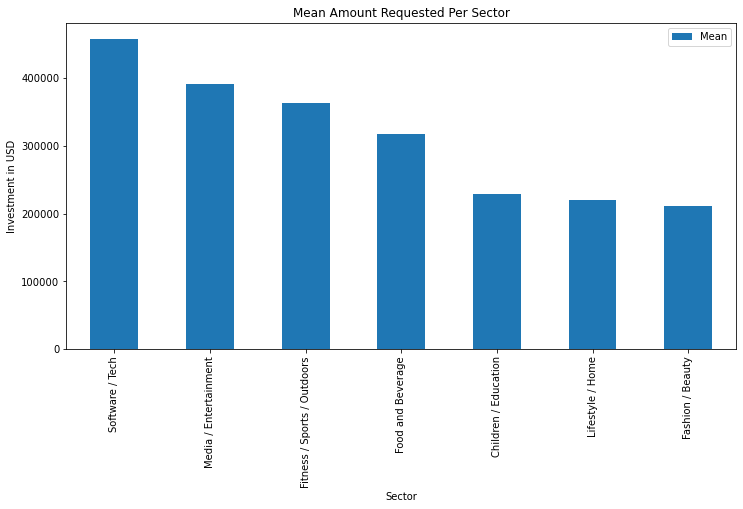

In [302]:
# Plot of Mean Amount Requested Per Sector 
amt_req_df.loc[imp_business_sectors, :].sort_values('Mean',ascending=False)[['Mean']].plot(kind='bar',figsize=(12,6))
plt.title('Mean Amount Requested Per Sector')
plt.ylabel('Investment in USD')
plt.show();

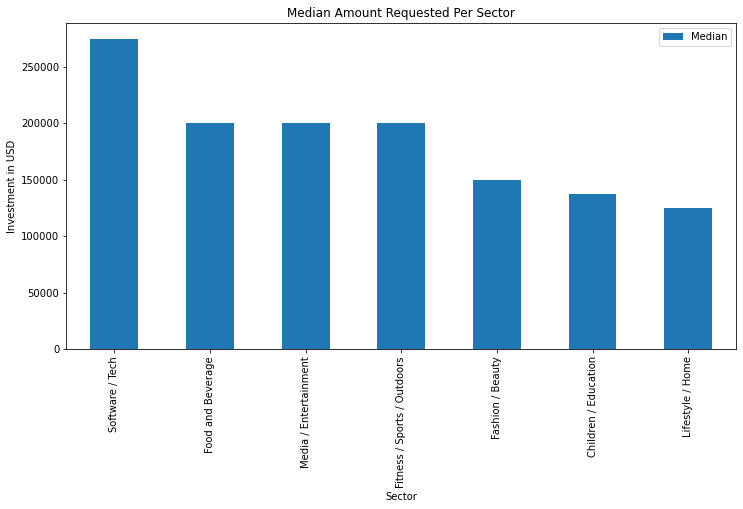

In [303]:
# Plot of Median Amount Requested Per Sector
amt_req_df.loc[imp_business_sectors, :].sort_values('Median',ascending=False)[['Median']].plot(kind='bar',figsize=(12,6))
plt.title('Median Amount Requested Per Sector')
plt.ylabel('Investment in USD')
plt.show();

#### The above plots show that there are a few sectors (like Software/Tech, Media and Entertainment, and Fitness/Sports/Outdoors ) which had 'outliers' towards the higher end, i.e. some pitchers requested extremely high Amount as compared to the general ask for that particular sector.

In [61]:
# Checking mean and median AmountRequested for each sector
for i in sectors:
    print(f"Sector: {i}",end='\n')
    print(f"Mean: {df2[df2[i]==1]['AmountRequested'].mean()}",end='\n')
    print(f"Median: {df2[df2[i]==1]['AmountRequested'].median()}",end='\n')

Sector: Health / Wellness
Mean: 339166.6666666667
Median: 325000.0
Sector: Food and Beverage
Mean: 317843.74994791666
Median: 200000.0
Sector: Business Services
Mean: 265266.6666666667
Median: 150000.0
Sector: Lifestyle / Home
Mean: 220430.1075268817
Median: 125000.0
Sector: Software / Tech
Mean: 458083.3333333333
Median: 275000.0
Sector: Children / Education
Mean: 228796.29611111112
Median: 137500.0
Sector: Automotive
Mean: 203571.42857142858
Median: 200000.0
Sector: Fashion / Beauty
Mean: 211915.79
Median: 150000.0
Sector: Media / Entertainment
Mean: 390810.80945945944
Median: 200000.0
Sector: Fitness / Sports / Outdoors
Mean: 362909.0909090909
Median: 200000.0
Sector: Pet Products
Mean: 162500.00277777776
Median: 112500.025
Sector: Travel
Mean: 300000.0
Median: 100000.0
Sector: Green/CleanTech
Mean: 400000.0
Median: 400000.0
Sector: Uncertain / Other
Mean: 345000.0
Median: 400000.0


### Now, let's focus on Equity Requested

In [63]:
# Appending the mean and median 'EquityRequested' for each business sector in two lists and then creating a dataframe out of it.
equity_req_mean = []
for i in sectors:
    equity_req_mean.append(df2[df2[i]==1]['EquityRequested'].mean())

equity_req_median = []
for i in sectors:
    equity_req_median.append(df2[df2[i]==1]['EquityRequested'].median())

In [64]:
equity_req_df = pd.DataFrame({'Sector':sectors, 'Mean': equity_req_mean, 'Median': equity_req_median})

In [65]:
equity_req_df.set_index('Sector',inplace=True)

In [66]:
equity_req_df

,Mean,Median
Sector,,
Health / Wellness,0.100000,0.10
Food and Beverage,0.150729,0.15
Business Services,0.166667,0.15
Lifestyle / Home,0.167581,0.15
Software / Tech,0.128958,0.10
Children / Education,0.145926,0.15
Automotive,0.117143,0.10
Fashion / Beauty,0.168011,0.20
Media / Entertainment,0.161351,0.15


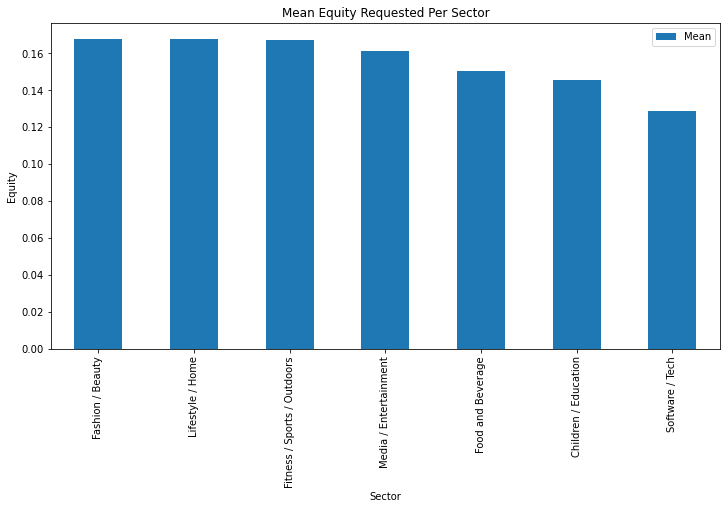

In [304]:
# Plot of Mean Equity Requested Per Sector
equity_req_df.loc[imp_business_sectors, :].sort_values('Mean',ascending=False)[['Mean']].plot(kind='bar',figsize=(12,6))
plt.title('Mean Equity Requested Per Sector')
plt.ylabel('Equity')
plt.show();

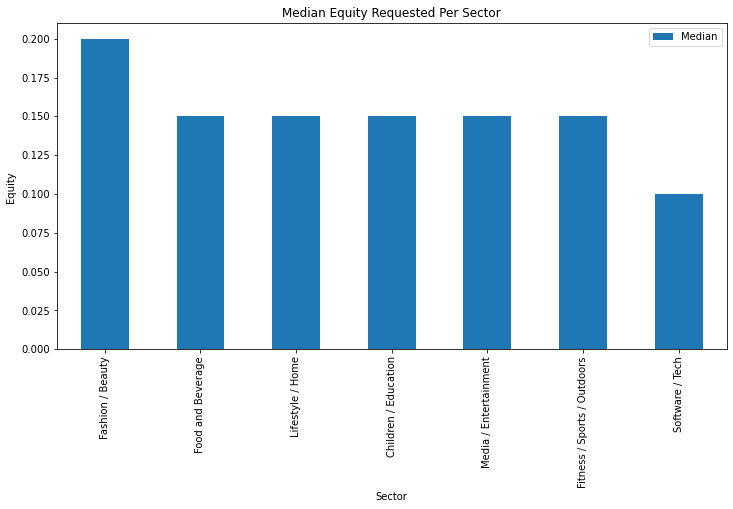

In [305]:
# Plot of Median Equity Requested Per Sector
equity_req_df.loc[imp_business_sectors, :].sort_values('Median',ascending=False)[['Median']].plot(kind='bar',figsize=(12,6))
plt.title('Median Equity Requested Per Sector')
plt.ylabel('Equity ')
plt.show();

#### Unlike the plots of Amount Requested, this has only 1 sector which is a potential outlier which is Fitness/Sports/Outdoors. This shows that people are very cautious and aware when it comes to giving equity.

In [69]:
# Checking mean and median Equity Requested for each sector
for i in sectors:
    print(f"Sector: {i}",end='\n')
    print(f"Mean: {df2[df2[i]==1]['EquityRequested'].mean()}",end='\n')
    print(f"Median: {df2[df2[i]==1]['EquityRequested'].median()}",end='\n')

Sector: Health / Wellness
Mean: 0.10000000000000002
Median: 0.1
Sector: Food and Beverage
Mean: 0.1507291666666667
Median: 0.15
Sector: Business Services
Mean: 0.16666666666666666
Median: 0.15
Sector: Lifestyle / Home
Mean: 0.16758064516129034
Median: 0.15
Sector: Software / Tech
Mean: 0.1289583333333333
Median: 0.1
Sector: Children / Education
Mean: 0.14592592592592593
Median: 0.15
Sector: Automotive
Mean: 0.11714285714285715
Median: 0.1
Sector: Fashion / Beauty
Mean: 0.16801052631578947
Median: 0.2
Sector: Media / Entertainment
Mean: 0.16135135135135137
Median: 0.15
Sector: Fitness / Sports / Outdoors
Mean: 0.16754545454545458
Median: 0.15
Sector: Pet Products
Mean: 0.16444444444444445
Median: 0.15
Sector: Travel
Mean: 0.08333333333333333
Median: 0.1
Sector: Green/CleanTech
Mean: 0.05
Median: 0.05
Sector: Uncertain / Other
Mean: 0.11620000000000001
Median: 0.1


### LET'S REPEAT THE ABOVE 2 PROCESS FOR THOSE WHO GOT THE DEAL

### Amount Requested

In [70]:
deal_amt_req_mean = []
for i in sectors:
    deal_amt_req_mean.append(df2_success[df2_success[i]==1]['AmountRequested'].mean())

deal_amt_req_median = []
for i in sectors:
    deal_amt_req_median.append(df2_success[df2_success[i]==1]['AmountRequested'].median())

In [71]:
deal_amt_req_df = pd.DataFrame({'Sector':sectors, 'Mean': deal_amt_req_mean, 'Median': deal_amt_req_median})

In [72]:
deal_amt_req_df.set_index('Sector',inplace=True)

In [306]:
deal_amt_req_df.loc[imp_business_sectors,:]

,Mean,Median
Sector,,
Food and Beverage,320727.272727,150000.000
Lifestyle / Home,204649.122807,125000.000
Software / Tech,299571.428571,250000.000
Children / Education,257297.298649,150000.000
Fashion / Beauty,176521.741413,127500.000
Media / Entertainment,274444.441667,199999.975
Fitness / Sports / Outdoors,272166.666667,165000.000


In [74]:
df2_success['Travel'].sum()

0

#### This shows that no company which worled solely in 'Travel' sector got the deal

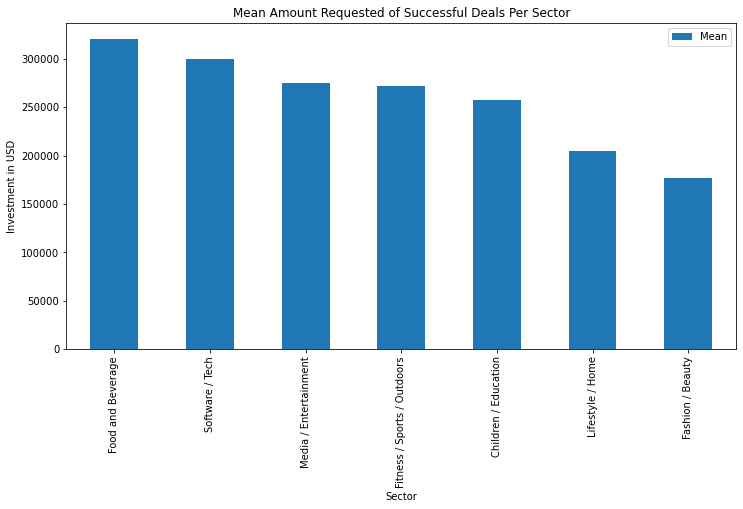

In [307]:
deal_amt_req_df.loc[imp_business_sectors,:].sort_values('Mean',ascending=False)[['Mean']].plot(kind='bar',figsize=(12,6))
plt.title('Mean Amount Requested of Successful Deals Per Sector')
plt.ylabel('Investment in USD')
plt.show();

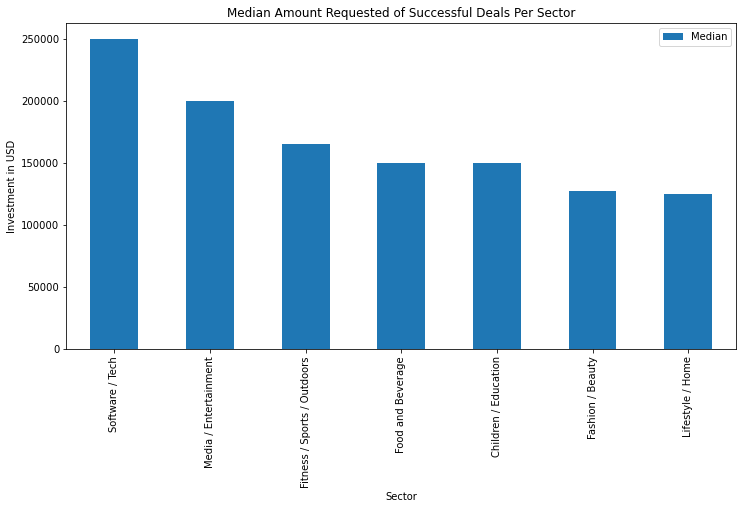

In [308]:
deal_amt_req_df.loc[imp_business_sectors,:].sort_values('Median',ascending=False)[['Median']].plot(kind='bar',figsize=(12,6))
plt.title('Median Amount Requested of Successful Deals Per Sector')
plt.ylabel('Investment in USD')
plt.show();

In [77]:
for i in sectors:
    print(f"Sector: {i}",end='\n')
    print(f"Mean: {df2_success[df2_success[i]==1]['AmountRequested'].mean()}",end='\n')
    print(f"Median: {df2_success[df2_success[i]==1]['AmountRequested'].median()}",end='\n')

Sector: Health / Wellness
Mean: 374285.71428571426
Median: 350000.0
Sector: Food and Beverage
Mean: 320727.2727272727
Median: 150000.0
Sector: Business Services
Mean: 109285.71428571429
Median: 100000.0
Sector: Lifestyle / Home
Mean: 204649.12280701756
Median: 125000.0
Sector: Software / Tech
Mean: 299571.4285714286
Median: 250000.0
Sector: Children / Education
Mean: 257297.29864864866
Median: 150000.0
Sector: Automotive
Mean: 230000.0
Median: 200000.0
Sector: Fashion / Beauty
Mean: 176521.7414130435
Median: 127500.0
Sector: Media / Entertainment
Mean: 274444.44166666665
Median: 199999.975
Sector: Fitness / Sports / Outdoors
Mean: 272166.6666666667
Median: 165000.0
Sector: Pet Products
Mean: 172727.27727272728
Median: 100000.05
Sector: Travel
Mean: nan
Median: nan
Sector: Green/CleanTech
Mean: 400000.0
Median: 400000.0
Sector: Uncertain / Other
Mean: 350000.0
Median: 350000.0


### Repeating the process for Equity Requested of all the successful deals

In [79]:
# Creating two lists containing the mean equity requested for each business sector for all deals and for successful deals and then making a dataframe out of it.
deal_equity_req_mean = []
for i in sectors:
    deal_equity_req_mean.append(df2_success[df2_success[i]==1]['EquityRequested'].mean())

deal_equity_req_median = []
for i in sectors:
    deal_equity_req_median.append(df2_success[df2_success[i]==1]['EquityRequested'].median())

In [80]:
deal_equity_req_df = pd.DataFrame({'Sector':sectors, 'Mean': deal_equity_req_mean, 'Median': deal_equity_req_median})

In [81]:
deal_equity_req_df.set_index('Sector',inplace=True)

In [309]:
deal_equity_req_df.loc[imp_business_sectors,:]

,Mean,Median
Sector,,
Food and Beverage,0.139182,0.110
Lifestyle / Home,0.167544,0.100
Software / Tech,0.126071,0.100
Children / Education,0.148108,0.150
Fashion / Beauty,0.173913,0.200
Media / Entertainment,0.127778,0.100
Fitness / Sports / Outdoors,0.152000,0.135


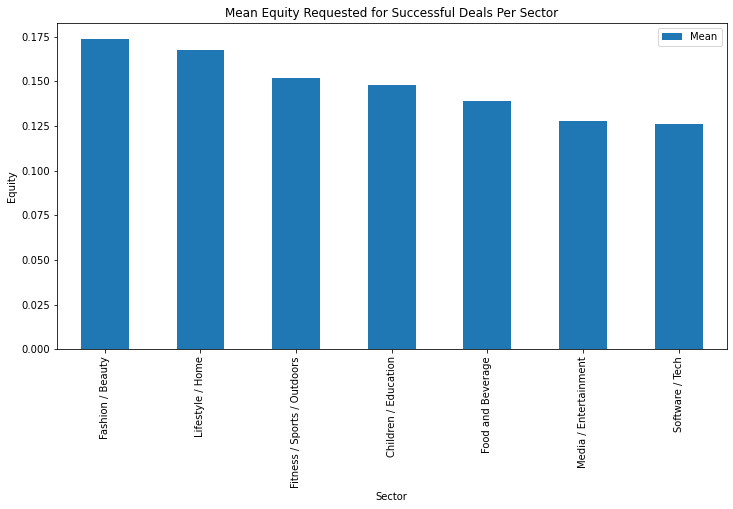

In [310]:
deal_equity_req_df.loc[imp_business_sectors,:].sort_values('Mean',ascending=False)[['Mean']].plot(kind='bar',figsize=(12,6))
plt.title('Mean Equity Requested for Successful Deals Per Sector')
plt.ylabel('Equity')
plt.show();

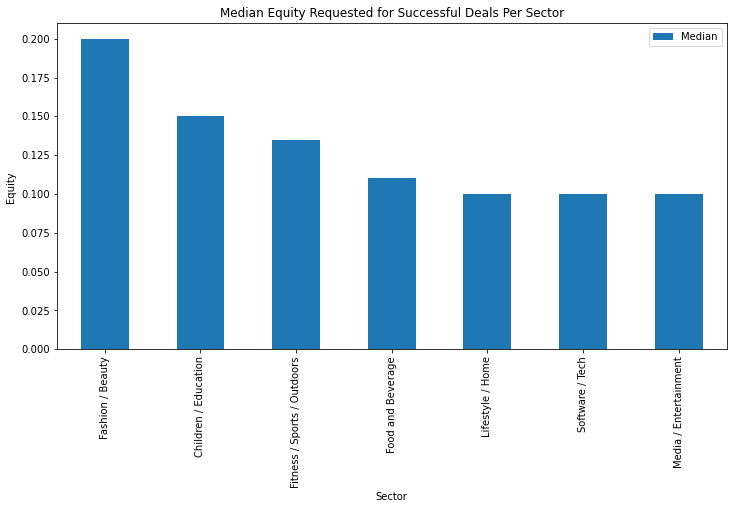

In [311]:
deal_equity_req_df.loc[imp_business_sectors,:].sort_values('Median',ascending=False)[['Median']].plot(kind='bar',figsize=(12,6))
plt.title('Median Equity Requested for Successful Deals Per Sector')
plt.ylabel('Equity ')
plt.show();

## Let's take the top 4 sectors and see how much amount and equity should be requested.
For Amount Requested, we take log (as the values are very high) and then we take mean + standard deviation as 'Upper Band 'and mean - standard deviation as 'Lower Band'. This range (as per gaussian distribution) will give us 68% likelihood of Amount Value which managed to get the deal. We'll do same thing for Equity requested but this time we won't use log transformation as the values are low.

In [188]:
# Assuming Log Normal distribution we figure out the upper and lower limit for 68% likelihood of getting a deal
for i in sectors:
    print(f'Sector: {i}', end='\n')
    print(f"Lower Band: {np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.mean() - np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.std()}")
    #print('\n')
    print(f"Upper Band: {np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.mean() + np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.std()}")
    print('\n')

Sector: Health / Wellness
Lower Band: 11.02042002747688
Upper Band: 13.533175911239994


Sector: Food and Beverage
Lower Band: 11.203561807977518
Upper Band: 13.091609525581287


Sector: Business Services
Lower Band: 10.364755080824025
Upper Band: 12.234908741465656


Sector: Lifestyle / Home
Lower Band: 11.042871723843776
Upper Band: 12.68871145729239


Sector: Software / Tech
Lower Band: 11.457247174093789
Upper Band: 13.156046997209762


Sector: Children / Education
Lower Band: 11.041969931749852
Upper Band: 12.7981451657123


Sector: Automotive
Lower Band: 11.550383914351642
Upper Band: 12.763017345536092


Sector: Fashion / Beauty
Lower Band: 11.123111499699533
Upper Band: 12.529676258911646


Sector: Media / Entertainment
Lower Band: 11.205633884328455
Upper Band: 13.068751036505622


Sector: Fitness / Sports / Outdoors
Lower Band: 11.191374703046657
Upper Band: 13.008789874486391


Sector: Pet Products
Lower Band: 10.80322469525869
Upper Band: 12.617809607539728


Sector: Travel

C:\Users\HP\AppData\Local\Temp\ipykernel_32816\1163913154.py:3: RuntimeWarning: Mean of empty slice.
  print(f"Lower Band: {np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.mean() - np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.std()}")
C:\Users\HP\AppData\Local\Temp\ipykernel_32816\1163913154.py:5: RuntimeWarning: Mean of empty slice.
  print(f"Upper Band: {np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.mean() + np.log(df2_success[df2_success[i]==1]['AmountRequested']).values.std()}")


In [192]:
# Assuming Normal distribution we figure out the upper and lower limit for 68% likelihood of getting a deal
for i in sectors:
    print(f'Sector: {i}', end='\n')
    print(f"Lower Band: {(df2_success[df2_success[i]==1]['EquityRequested']).values.mean() - (df2_success[df2_success[i]==1]['EquityRequested']).values.std()}")
    #print('\n')
    print(f"Upper Band: {(df2_success[df2_success[i]==1]['EquityRequested']).values.mean() + (df2_success[df2_success[i]==1]['EquityRequested']).values.std()}")
    print('\n')

Sector: Health / Wellness
Lower Band: 0.0682710759759817
Upper Band: 0.1603003525954469


Sector: Food and Beverage
Lower Band: 0.06419234233618167
Upper Band: 0.21417129402745472


Sector: Business Services
Lower Band: 0.1465477516175151
Upper Band: 0.25345224838248487


Sector: Lifestyle / Home
Lower Band: 0.06388651756686003
Upper Band: 0.2712012017313856


Sector: Software / Tech
Lower Band: 0.04278666381330294
Upper Band: 0.20935619332955424


Sector: Children / Education
Lower Band: 0.07844335732389765
Upper Band: 0.21777285889231854


Sector: Automotive
Lower Band: 0.03901111248319204
Upper Band: 0.12898888751680798


Sector: Fashion / Beauty
Lower Band: 0.09579027885995763
Upper Band: 0.25203580809656406


Sector: Media / Entertainment
Lower Band: 0.07194513543821726
Upper Band: 0.18361042011733827


Sector: Fitness / Sports / Outdoors
Lower Band: 0.05242088572396318
Upper Band: 0.2515791142760368


Sector: Pet Products
Lower Band: 0.0648730815392825
Upper Band: 0.1805814639152

C:\Users\HP\AppData\Local\Temp\ipykernel_32816\3252743169.py:3: RuntimeWarning: Mean of empty slice.
  print(f"Lower Band: {(df2_success[df2_success[i]==1]['EquityRequested']).values.mean() - (df2_success[df2_success[i]==1]['EquityRequested']).values.std()}")
C:\Users\HP\AppData\Local\Temp\ipykernel_32816\3252743169.py:5: RuntimeWarning: Mean of empty slice.
  print(f"Upper Band: {(df2_success[df2_success[i]==1]['EquityRequested']).values.mean() + (df2_success[df2_success[i]==1]['EquityRequested']).values.std()}")


### If you are going with:
1) Lifestyle/Home : Ask for around USD 60K - USD 300K for an equity of 6% - 27% and valuate accordingly. (for a likelihood of 68%)
2) Software/Tech : Ask for around USD 100K - USD 600K for an equity of 4% - 21% and valuate accordingly. (for a likelihood of 68%) 
3) Food and Beverage: Ask for around USD 50K - USD 400K for an equity of 6% - 22% and valuate accordingly. (for a likelihood of 68%) 
4) Fitness/Sports/Outdoors: Ask for around USD 70K - USD 400K for an equity of 5% - 25% and valuate accordingly. (for a likelihood of 68%) 

### This shows almost the same trend as the previous one (only one outlier that is Lifestyle/Home). This cements our conclusion which we made earlier, that is, if you are practical and realistic regarding the cost of your product in the relevant business sector, then there is a higher chance for you to make the deal.

## Did the success depend on Ethnicity?

Eth1: Ethnicity of presenter 1, (African American = 1, White = 2, Asian = 3, Latino = 4, No presenter 1 = 0) <p>
Eth2: Ethnicity of presenter 2, (African American = 1, White = 2, Asian = 3, Latino = 4, No presenter 2 = 0) <p>
Eth3: Ethnicity of presenter 3, (African American = 1, White = 2, Asian = 3, Latino = 4, No presenter 3 = 0) <p>
Eth4: Ethnicity of presenter 4, (African American = 1, White = 2, Asian = 3, Latino = 4, No presenter 4 = 0) <p>
Eth5: Ethnicity of presenter 5, (African American = 1, White = 2, Asian = 3, Latino = 4, No presenter 5 = 0) <p>

### Eth 1 i.e. ethnicity of presenter 1

In [85]:
df2['Eth1'].value_counts()

2    417
4     64
1     51
3     17
0      2
Name: Eth1, dtype: int64

In [86]:
df2_success['Eth1'].value_counts()

2    230
4     31
1     28
3     12
Name: Eth1, dtype: int64

In [290]:
df2_success['Eth1'].value_counts() / df2['Eth1'].value_counts() # Checking the success rate for Eth1

0         NaN
1    0.549020
2    0.551559
3    0.705882
4    0.484375
Name: Eth1, dtype: float64

### Success rate of ethnicity of primary presenter (ranked in order):
<ol>
    <li> Asian: 70.58% </li>
    <li> White: 55.16% </li>
    <li> African American: 54.9% </li>
     <li> Hispanic/Latino: 48.44% </li>
</ol>
Note: 0 means no presenter

### Eth 2 i.e. ethnicity of presenter 2

In [88]:
df2['Eth2'].value_counts()

0    285
2    173
4     50
1     25
3     18
Name: Eth2, dtype: int64

In [89]:
df2_success['Eth2'].value_counts()

0    144
2    104
4     28
1     13
3     12
Name: Eth2, dtype: int64

In [291]:
df2_success['Eth2'].value_counts() / df2['Eth2'].value_counts() # Checking the success rate for Eth2

0    0.505263
2    0.601156
4    0.560000
1    0.520000
3    0.666667
Name: Eth2, dtype: float64

### Success rate (ranked in order):
<ol>
    <li> Asian: 66.67% </li>
    <li> White: 60.11% </li>
    <li> Hispanic/Latino: 56% </li>
    <li> African American: 52% </li>
</ol>
Note: 0 means no presenter

## Let's see the trend for eth 3 and 4

In [292]:
# Checking the success rate for Eth3
df2_success['Eth3'].value_counts() / df2['Eth3'].value_counts()

0    0.550669
1         NaN
2    0.526316
3    0.500000
4    0.500000
Name: Eth3, dtype: float64

### Success rate (ranked in order)
<ol>
    <li> No presenter: 55.07% </li>
    <li> White: 52.63% </li>
    <li> Asian: 50% </li>
    <li> Latino: 50% </li>
    <li> African/American: 0.00% </li>
    
</ol>

### In most of the cases (where there was a Deal), there were no 3rd presenter. After that, came Whites followed by Asians and Latino

In [293]:
# Checking the success rate for Eth4
df2_success['Eth4'].value_counts() / df2['Eth4'].value_counts()

0    0.546448
2    0.500000
Name: Eth4, dtype: float64

### Success rate (ranked in order)
<ol>
    <li> No presenter: 54.64% </li>
    <li> White: 50% </li>
</ol>

### In most of the successful (cracked the deal) cases there was no 4th presenter, if there was, then it was a White person.

### So we notice that the most 'successful' ethnicity was 'Asian' and the 2nd most successful group was 'White'. We have compared 'proportion of success' i.e. number of successful pitches (which got the deal)/total number of pitches made by the ethnicity group

### Now let's see which category did the products pitched by Asians and White fell into (we'll do this for normal and then those which got the deal)

In [93]:
df2_asian = df2[df2['Eth1']==3] # creating a dataframe where the ethnicity of the first presenter is 'Asian'

In [94]:
# Checking the business sectors in which Asians were involved the most. In short, which category product did Asians made the most
for i in sectors:
    print(f"Sector: {i} ; Proportion of products: {100 * df2_asian[i].sum()/len(df2_asian)}%",end='\n')
    print()

Sector: Health / Wellness ; Proportion of products: 11.764705882352942%

Sector: Food and Beverage ; Proportion of products: 11.764705882352942%

Sector: Business Services ; Proportion of products: 11.764705882352942%

Sector: Lifestyle / Home ; Proportion of products: 23.529411764705884%

Sector: Software / Tech ; Proportion of products: 0.0%

Sector: Children / Education ; Proportion of products: 5.882352941176471%

Sector: Automotive ; Proportion of products: 5.882352941176471%

Sector: Fashion / Beauty ; Proportion of products: 5.882352941176471%

Sector: Media / Entertainment ; Proportion of products: 5.882352941176471%

Sector: Fitness / Sports / Outdoors ; Proportion of products: 0.0%

Sector: Pet Products ; Proportion of products: 5.882352941176471%

Sector: Travel ; Proportion of products: 0.0%

Sector: Green/CleanTech ; Proportion of products: 5.882352941176471%

Sector: Uncertain / Other ; Proportion of products: 0.0%



### Seems like Asians invested the most in: 
<ul>
    <li> 'Lifestyle/Home': Proportion - 23.53% </li>
    <li> 'Food and Beverage': Proportion - 11.76% </li>
    <li> 'Health/Wellness': Proportion - 11.76% </li>
    <li> 'Business Services': Proportion - 11.76% </li>
</ul>

In [95]:
df2_asian_success = df2_success[df2_success['Eth1']==3] # creating a dataframe where the ethnicity of first presenter in Asian and the Deal was successful

In [295]:
# Checking the business sectors in which Asians were involved the most of all the successful deals. In short, which category product did Asians made the most
for i in sectors:
    print(f"Sector: {i} ; Proportion of products: {100 * df2_asian_success[i].sum()/len(df2_asian)}%",end='\n')
    print()

Sector: Health / Wellness ; Proportion of products: 5.882352941176471%

Sector: Food and Beverage ; Proportion of products: 11.764705882352942%

Sector: Business Services ; Proportion of products: 5.882352941176471%

Sector: Lifestyle / Home ; Proportion of products: 11.764705882352942%

Sector: Software / Tech ; Proportion of products: 0.0%

Sector: Children / Education ; Proportion of products: 5.882352941176471%

Sector: Automotive ; Proportion of products: 5.882352941176471%

Sector: Fashion / Beauty ; Proportion of products: 5.882352941176471%

Sector: Media / Entertainment ; Proportion of products: 5.882352941176471%

Sector: Fitness / Sports / Outdoors ; Proportion of products: 0.0%

Sector: Pet Products ; Proportion of products: 5.882352941176471%

Sector: Travel ; Proportion of products: 0.0%

Sector: Green/CleanTech ; Proportion of products: 5.882352941176471%

Sector: Uncertain / Other ; Proportion of products: 0.0%



### Asians made majority of products in Home/Lifestyle and recieved the most success in the same sector. 2nd best being Food and Beverage

## Now let's do the same thing for whites

In [97]:
df2_white = df2[df2['Eth1']==2] # Creating a dataframe where Eth==2

In [98]:
for i in sectors:
    print(f"Sector: {i} ; Proportion of products: {100 * df2_white[i].sum()/len(df2_white)}%",end='\n')
    print()

Sector: Health / Wellness ; Proportion of products: 1.4388489208633093%

Sector: Food and Beverage ; Proportion of products: 17.985611510791365%

Sector: Business Services ; Proportion of products: 4.796163069544365%

Sector: Lifestyle / Home ; Proportion of products: 16.30695443645084%

Sector: Software / Tech ; Proportion of products: 3.8369304556354917%

Sector: Children / Education ; Proportion of products: 10.311750599520384%

Sector: Automotive ; Proportion of products: 1.4388489208633093%

Sector: Fashion / Beauty ; Proportion of products: 17.26618705035971%

Sector: Media / Entertainment ; Proportion of products: 7.434052757793765%

Sector: Fitness / Sports / Outdoors ; Proportion of products: 10.071942446043165%

Sector: Pet Products ; Proportion of products: 3.597122302158273%

Sector: Travel ; Proportion of products: 0.47961630695443647%

Sector: Green/CleanTech ; Proportion of products: 0.0%

Sector: Uncertain / Other ; Proportion of products: 0.7194244604316546%



In [99]:
df2_white_success = df2_success[df2_success['Eth1']==2]

In [100]:
for i in sectors:
    print(f"Sector: {i} ; Proportion of products: {100 * df2_white_success[i].sum()/len(df2_white)}%",end='\n')
    print()

Sector: Health / Wellness ; Proportion of products: 1.1990407673860912%

Sector: Food and Beverage ; Proportion of products: 10.311750599520384%

Sector: Business Services ; Proportion of products: 0.7194244604316546%

Sector: Lifestyle / Home ; Proportion of products: 9.59232613908873%

Sector: Software / Tech ; Proportion of products: 2.6378896882494005%

Sector: Children / Education ; Proportion of products: 6.954436450839329%

Sector: Automotive ; Proportion of products: 0.9592326139088729%

Sector: Fashion / Beauty ; Proportion of products: 8.15347721822542%

Sector: Media / Entertainment ; Proportion of products: 3.597122302158273%

Sector: Fitness / Sports / Outdoors ; Proportion of products: 5.995203836930456%

Sector: Pet Products ; Proportion of products: 2.3980815347721824%

Sector: Travel ; Proportion of products: 0.0%

Sector: Green/CleanTech ; Proportion of products: 0.0%

Sector: Uncertain / Other ; Proportion of products: 0.23980815347721823%



### Whites made majority of products in Food and Beverage and recieved the most success in the same sector. 2nd best being Lifestyle and Home

## However, we didn't find any logical conclusion whether belonging to a particular ethnicity gets you higher chances of getting a deal in Shark Tank.

## Now let's look into the location of the startups pitched

In [101]:
df2['CompanyState'].value_counts() # Checking the value counts of each state

CA        123
NY         43
FL         38
TX         38
GA         19
MA         18
IL         17
CO         17
NC         14
UT         13
PA         13
OH         12
OR         10
AZ         10
WA          9
NJ          7
VA          7
NV          6
MI          6
IN          5
HI          4
CT          4
MO          3
DC          3
SC          3
TN          3
MD          3
VT          3
LA          2
WI          2
MS          2
MN          2
AL          2
ID          2
RI          2
OK          2
KS          2
NH          1
NE          1
MT          1
AR          1
DE          1
AK          1
KY          1
IA          1
Canada      1
Name: CompanyState, dtype: int64

In [102]:
100 * df2_success['CompanyState'].value_counts()/len(df2) # Checking the proportion of each state in all the successful deals which were made

CA    11.978221
TX     4.718693
FL     4.355717
NY     3.085299
IL     1.996370
UT     1.814882
CO     1.814882
GA     1.814882
PA     1.633394
WA     1.451906
OH     1.451906
NJ     1.270417
MA     1.088929
NC     1.088929
AZ     0.907441
OR     0.907441
MO     0.544465
MI     0.362976
SC     0.362976
NV     0.362976
VA     0.362976
CT     0.362976
OK     0.181488
KY     0.181488
HI     0.181488
KS     0.181488
MS     0.181488
DE     0.181488
LA     0.181488
MN     0.181488
MD     0.181488
IA     0.181488
NH     0.181488
RI     0.181488
AL     0.181488
AR     0.181488
IN     0.181488
TN     0.181488
VT     0.181488
Name: CompanyState, dtype: float64

In [103]:
# Checking the proportion of missing values
100 * df2['CompanyState'].isna().sum()/len(df2) # 13.25% values missing

13.248638838475499

In [104]:
df2.columns

Index(['ReceiveOffer', 'RejectOffer', 'Deal_Yes', 'Number of Presenters',
       'Eth1', 'Eth2', 'Eth3', 'Eth4', 'Eth5', 'Male1', 'Male2', 'Male3',
       'Male4', 'Novelties', 'Health / Wellness', 'Food and Beverage',
       'Business Services', 'Lifestyle / Home', 'Software / Tech',
       'Children / Education', 'Automotive', 'Fashion / Beauty',
       'Media / Entertainment', 'Fitness / Sports / Outdoors', 'Pet Products',
       'Travel', 'Green/CleanTech', 'Uncertain / Other', 'MalePresenter',
       'FemalePresenter', 'MixedGenderPresenters', 'CompanyState',
       'AmountRequested', 'EquityRequested', 'ImpliedValuationRequested',
       'BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec',
       'DaymondJohn', 'KevinOLeary', 'KevinHarrington', 'Guest', 'Total_Males',
       'Total_Females', 'Total_Pitchers', 'Season'],
      dtype='object')

### Instead of just taking states, we'll bin states into regions like 'New England', 'Mid Atlantic' etc. For this, we'll create a function to bin all the states into their respective categories.

In [105]:
df2['CompanyState'].unique() # checking the names of unique Company States

array(['NC', 'FL', 'NJ', 'GA', 'CA', 'OR', 'TX', 'MD', 'IA', 'IL', 'SC',
       'NY', 'IN', 'TN', 'VA', 'PA', 'MA', 'KS', 'AZ', 'OH', 'OK', 'AR',
       'CT', 'AL', 'RI', 'MT', 'ID', 'UT', 'CO', 'NE', 'NH', 'VT', 'WA',
       'MN', 'MS', 'NV', 'LA', 'MO', 'MI', 'DC', 'DE', 'AK', 'KY', 'WI',
       nan, 'HI', 'Canada'], dtype=object)

In [106]:
def region_creator(x):
    """
    This function takes in the state and bins it into its respective Region.
    """
    if x in ['CT','ME','MA','NH','RI','VT']:
        return 'New England'
    elif x in ['NJ','NY','PA']:
        return 'Mid-Atlantic'
    elif x in ['IL','IN','MI','OH','WI']:
        return 'East North Central'
    elif x in ['IA','KS','MN','MO','NE','ND','SD']:
        return 'West North Central'
    elif x in ['DE','FL','GA','MD','NC','SC','VA','WV','DC']:
        return 'South Atlantic'
    elif x in ['AL','KY','MS','TN']:
        return 'East South Central'
    elif x in ['AR','LA','OK','TX']:
        return 'West South Central'
    elif x in ['AZ','CO','ID','MT','NV','NM','UT','WY']:
        return 'Mountain'
    elif x in ['AK','CA','HI','OR','WA']:
        return 'Pacific'
    else:
        return x

In [107]:
df2['Region'] = df2['CompanyState'].apply(lambda x: region_creator(x)) # applying the function to create 'Region' column

<AxesSubplot:xlabel='Region', ylabel='AmountRequested'>

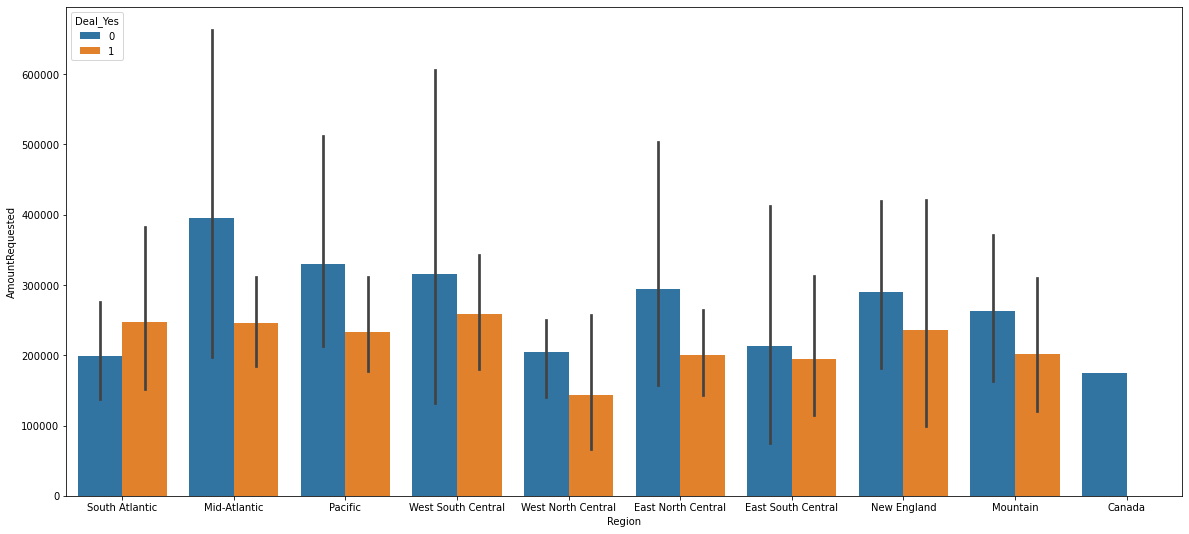

In [108]:
# Let's check the Amount Requested by startups belonging to various 'Regions' segregated by whether they got the deal or not, by creating a plot.
plt.figure(figsize=(20,9))
sns.barplot(data=df2,x='Region',y='AmountRequested',hue='Deal_Yes')

### We notice that, usually the Amount Requested for successful deals is actual lower than that of unsuccessful deals for all the Regions except for South Atlantic. Also, we can see a few outliers in 'New England' region (for Deal_Yes=1) as well.

<AxesSubplot:xlabel='CompanyState', ylabel='AmountRequested'>

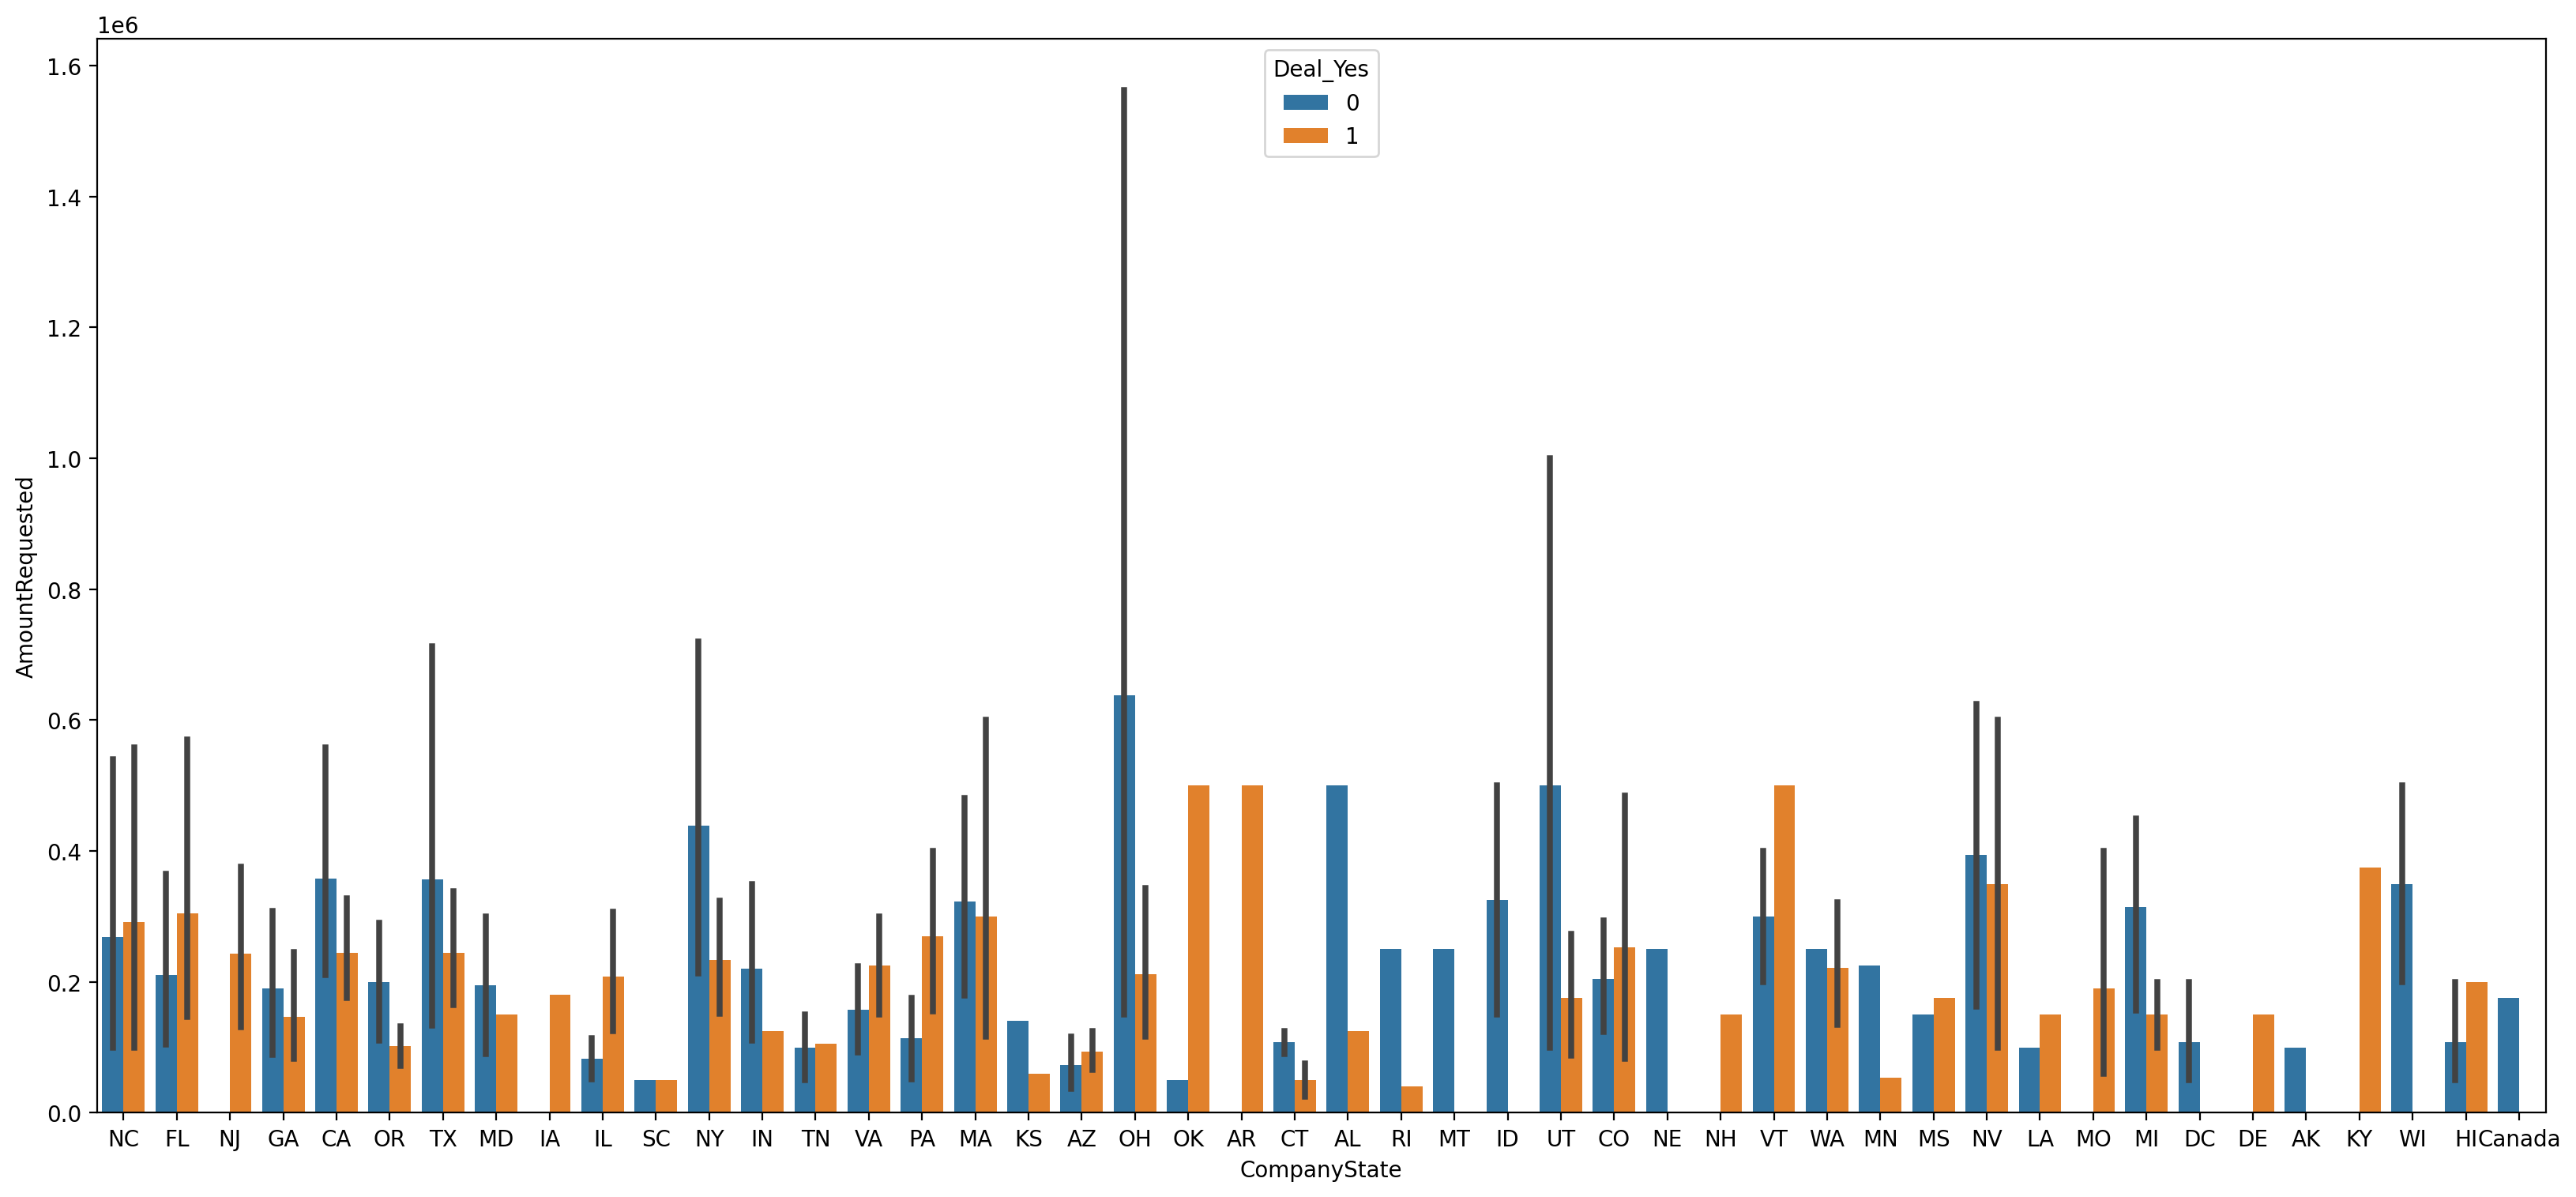

In [109]:
# Let's check the Amount Requested by startups belonging to various 'States' segregated by whether they got the deal or not, by creating a plot.
plt.figure(figsize=(20,9), dpi=200)
sns.barplot(data=df2,x='CompanyState',y='AmountRequested',hue='Deal_Yes')

### We notice a distinctivly high Amount Requested from Ohio (which was rejected due to 'overevaluation'). States like NC, FL, NJ, IA, IL, TN, VA, PA, AZ, OK (very high), AR (very high), CO, VT, MS, LA, MO, DE, KY, HI (19 states) have more successful deals rather than unsuccessful ones.

## Imputing missing values in 'State' and 'Region' columns.

In [110]:
df2[pd.isnull(df2['Region'])==True]['AmountRequested'].median() # checking the median value of Amount Requested for all the samples where 'State' and 'Region' are missing

200000.0

In [111]:
# checking the median value of Amount Requested for all each Region
df2.groupby('Region').median()['AmountRequested'].sort_values(ascending=False).head(10)

Region
Canada                175000.0
Pacific               175000.0
East North Central    165000.0
East South Central    150000.0
Mid-Atlantic          150000.0
New England           150000.0
West South Central    150000.0
West North Central    140000.0
South Atlantic        115000.0
Mountain              100000.0
Name: AmountRequested, dtype: float64

In [112]:
df2_success['Region'] = df2_success['CompanyState'].apply(lambda x: region_creator(x)) # Creating 'Region' column in original dataframe

C:\Users\HP\AppData\Local\Temp\ipykernel_32816\3126324615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_success['Region'] = df2_success['CompanyState'].apply(lambda x: region_creator(x)) # Creating 'Region' column in original dataframe


In [113]:
df2_success.groupby('Region').median()['AmountRequested'].sort_values(ascending=False).head(10) # checking the median value of Amount Requested for all each Region for the success dataframe

Region
Mid-Atlantic          200000.0
West South Central    200000.0
East North Central    165000.0
East South Central    150000.0
Pacific               150000.0
South Atlantic        150000.0
New England           125000.0
Mountain              100000.0
West North Central     85000.0
Name: AmountRequested, dtype: float64

### In the original dataframe, Canada and Pacific have the highest median Amount Requested but if we see only successful deals then Mid-Atlantic and West South Central have the highest median value. Let's see why?

In [114]:
df2['Region'].value_counts() # value counts of each region in original dataframe

Pacific               147
South Atlantic         88
Mid-Atlantic           63
Mountain               49
West South Central     43
East North Central     42
New England            28
West North Central      9
East South Central      8
Canada                  1
Name: Region, dtype: int64

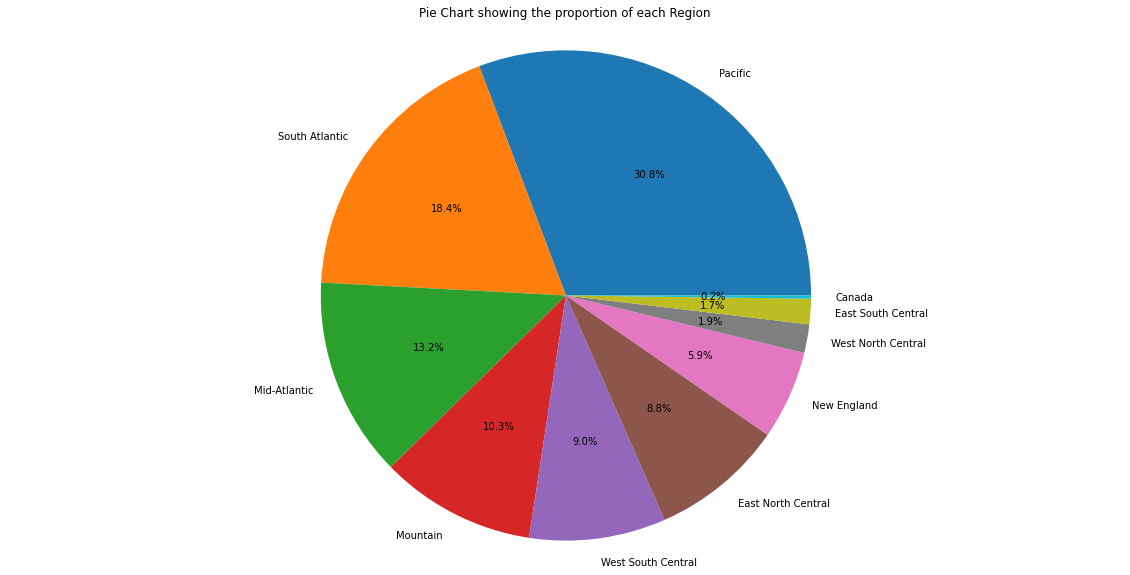

In [115]:
# Creating a pie chart showing proportion of each region in terms of pitches
my_data = df2['Region'].value_counts().values
my_labels = df2['Region'].value_counts().index
plt.figure(figsize=(20,10))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Pie Chart showing the proportion of each Region')
plt.axis('equal')
plt.show()

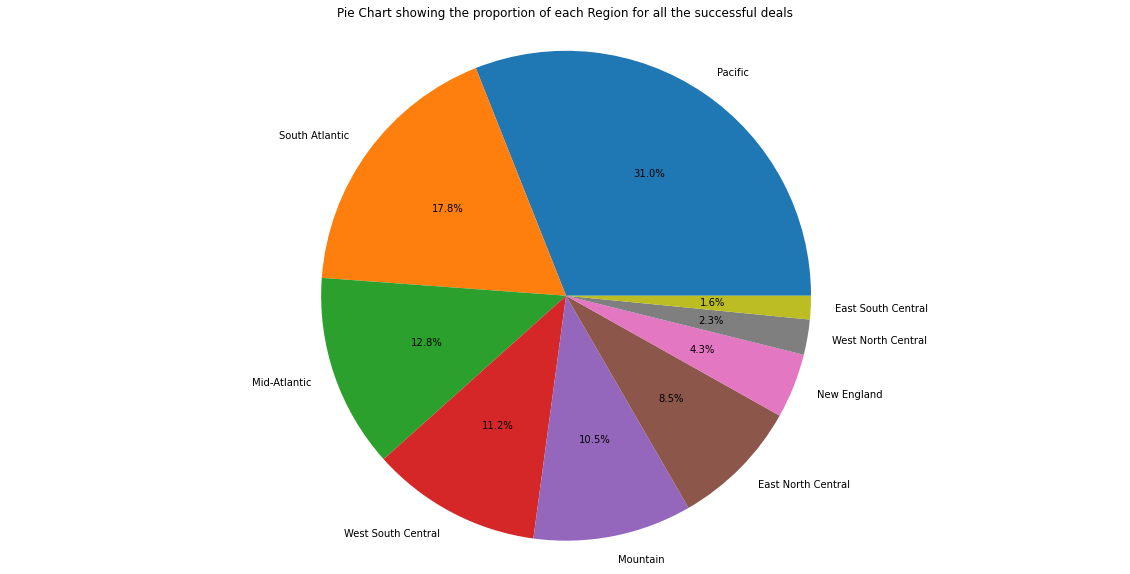

In [299]:
# Creating a pie chart showing proportion of each region in terms of pitches for all the successful deals
my_data = df2_success['Region'].value_counts().values
my_labels = df2_success['Region'].value_counts().index
plt.figure(figsize=(20,10))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Pie Chart showing the proportion of each Region for all the successful deals')
plt.axis('equal')
plt.show()

In [116]:
df2_success['Region'].value_counts() # value counts of each region in the dataframe which has only successful deals

Pacific               80
South Atlantic        46
Mid-Atlantic          33
West South Central    29
Mountain              27
East North Central    22
New England           11
West North Central     6
East South Central     4
Name: Region, dtype: int64

In [117]:
100 * df2_success['Region'].value_counts()/df2['Region'].value_counts() # success ratio of each region

Canada                      NaN
East North Central    52.380952
East South Central    50.000000
Mid-Atlantic          52.380952
Mountain              55.102041
New England           39.285714
Pacific               54.421769
South Atlantic        52.272727
West North Central    66.666667
West South Central    67.441860
Name: Region, dtype: float64

Text(0.5, 0, 'Region')

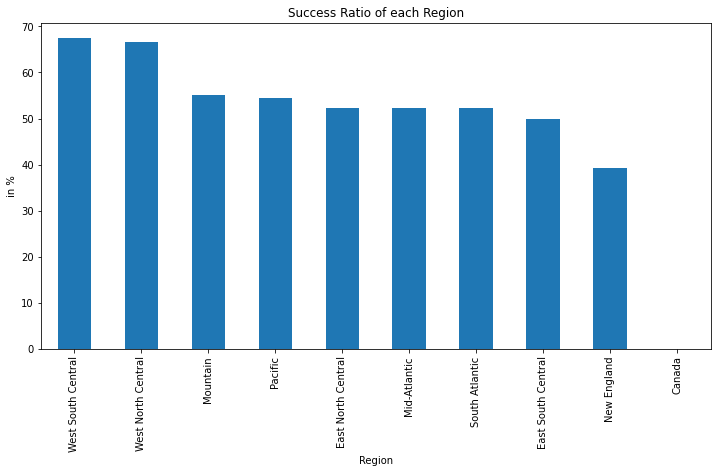

In [118]:
pd.Series(100 * df2_success['Region'].value_counts()/df2['Region'].value_counts()).sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Success Ratio of each Region')
plt.ylabel('in %')
plt.xlabel('Region')

### Following are the most successful Regions:
<ol>
    <li> West South Central: Success Ratio: 67.44% </li>
    <li> West North Central: Success Ratio: 66.67% </li>
    <li> Mountain: Success Ratio: 55.10%% </li>
    <li> Pacific: Success Ratio: 54.42% </li>
    <li> Tie between East North Central and Mid-Atlantic : Success Ratio: 52.38%  </li>
</ol>

### We notice that West South Central has highest success ratio, which could lead to this region having the highest median Amount Requested (in the data containing only successful deals). Whereas Pacific is not as successful as West South Central region but in Pacific region there were many outliers which impacted the median value. However, in case of Mid-Atlantic there quite a few outliers in the original dataframe (many of them were at the lower limit), because of this its median value in the original dataframe was reduced. But in case of only successful deals dataframe there were not much outliers (towards the lower end) in Mid-Atlantic (Presenters knew to keep the value practical and realistic) which raised the median.

In [119]:
df2.groupby('CompanyState').median()['AmountRequested'].sort_values(ascending=False).head(5)

CompanyState
AR    500000.0
VT    400000.0
NV    375000.0
KY    375000.0
WI    350000.0
Name: AmountRequested, dtype: float64

In [120]:
df2_success.groupby('CompanyState').median()['AmountRequested'].sort_values(ascending=False).head(5)

CompanyState
OK    500000.0
VT    500000.0
AR    500000.0
KY    375000.0
NV    350000.0
Name: AmountRequested, dtype: float64

### There are many states, so let's select those states which have high value count (more than the median)

In [121]:
df2['CompanyState'].value_counts().head(5) # selecting top5 highest count states

CA    123
NY     43
FL     38
TX     38
GA     19
Name: CompanyState, dtype: int64

In [122]:
df2['CompanyState'].value_counts().index

Index(['CA', 'NY', 'FL', 'TX', 'GA', 'MA', 'IL', 'CO', 'NC', 'UT', 'PA', 'OH',
       'OR', 'AZ', 'WA', 'NJ', 'VA', 'NV', 'MI', 'IN', 'HI', 'CT', 'MO', 'DC',
       'SC', 'TN', 'MD', 'VT', 'LA', 'WI', 'MS', 'MN', 'AL', 'ID', 'RI', 'OK',
       'KS', 'NH', 'NE', 'MT', 'AR', 'DE', 'AK', 'KY', 'IA', 'Canada'],
      dtype='object')

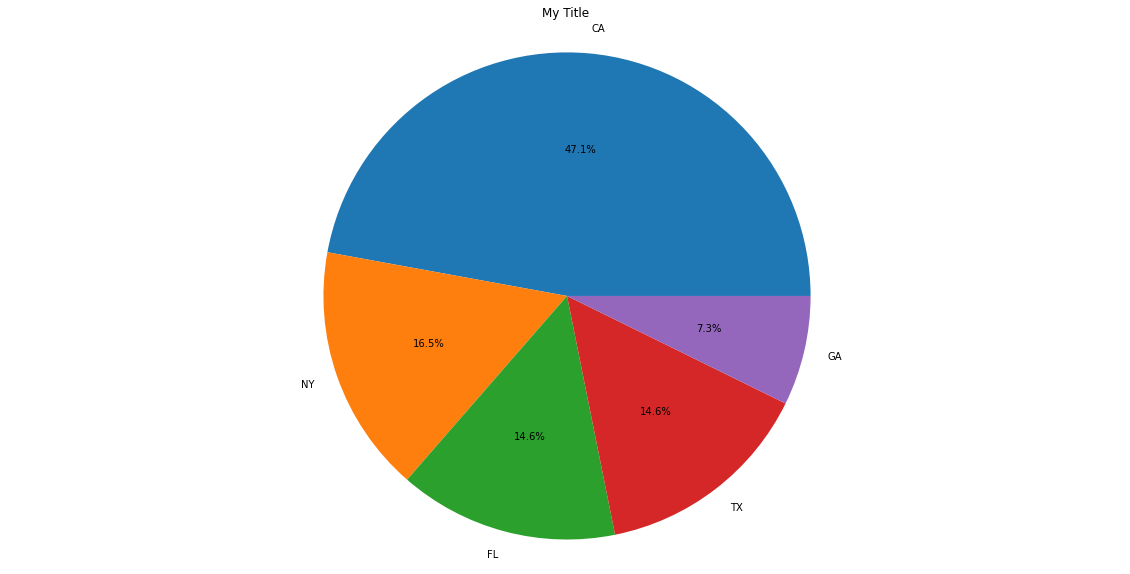

In [123]:
# Creating a pie chart showing proportion of each state in terms of pitches
my_data = df2['CompanyState'].value_counts().head(5).values
my_labels = df2['CompanyState'].value_counts().head(5).index
plt.figure(figsize=(20,10))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Pie Chart Showing proportion of each state in terms of pitches')
plt.axis('equal')
plt.show();

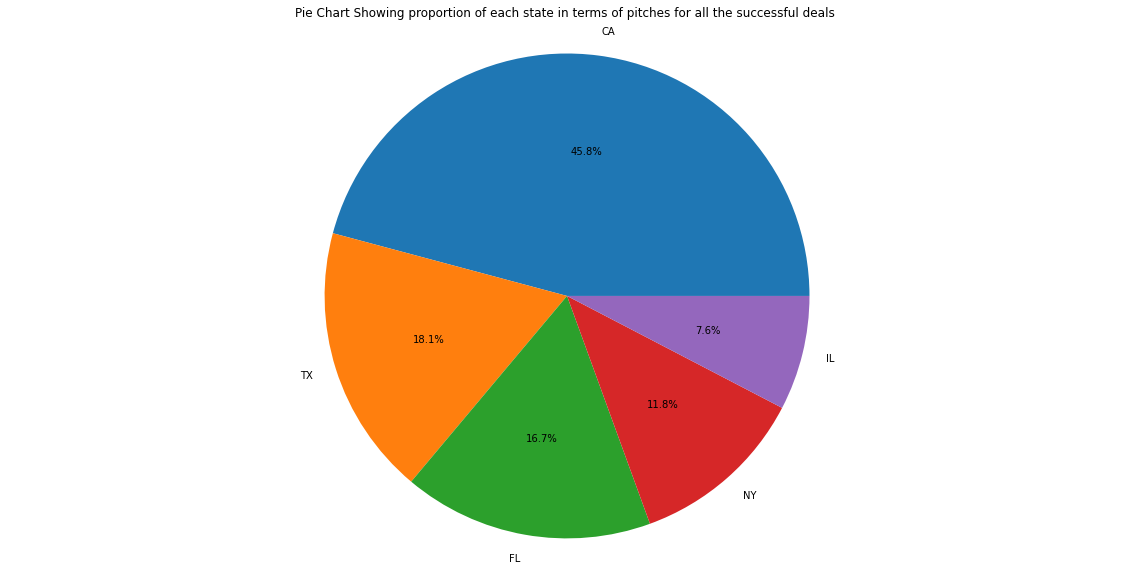

In [297]:
# Creating a pie chart showing proportion of each state in terms of pitches for all the successful deals
my_data = df2_success['CompanyState'].value_counts().head(5).values
my_labels = df2_success['CompanyState'].value_counts().head(5).index
plt.figure(figsize=(20,10))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Pie Chart Showing proportion of each state in terms of pitches for all the successful deals')
plt.axis('equal')
plt.show();

In [124]:
# making a list of those state names
top_states = df2['CompanyState'].value_counts().head(5).index
top_states

Index(['CA', 'NY', 'FL', 'TX', 'GA'], dtype='object')

In [125]:
df2_success['CompanyState'].value_counts().head(5) # 7 is the median

CA    66
TX    26
FL    24
NY    17
IL    11
Name: CompanyState, dtype: int64

## Top 4 states which have high number of participants 

In [126]:
pd.Series(100 * df2_success['CompanyState'].value_counts().head(6)/df2['CompanyState'].value_counts().head(6)).dropna().sort_values(ascending=False) # success ratio of each state

TX    68.421053
FL    63.157895
CA    53.658537
NY    39.534884
Name: CompanyState, dtype: float64

### Seems like TX, FL, NY and CA are actually the most successful states (despite having some amount of failure rate, but looking at the volume of these states this much failure rate can be tolerated.

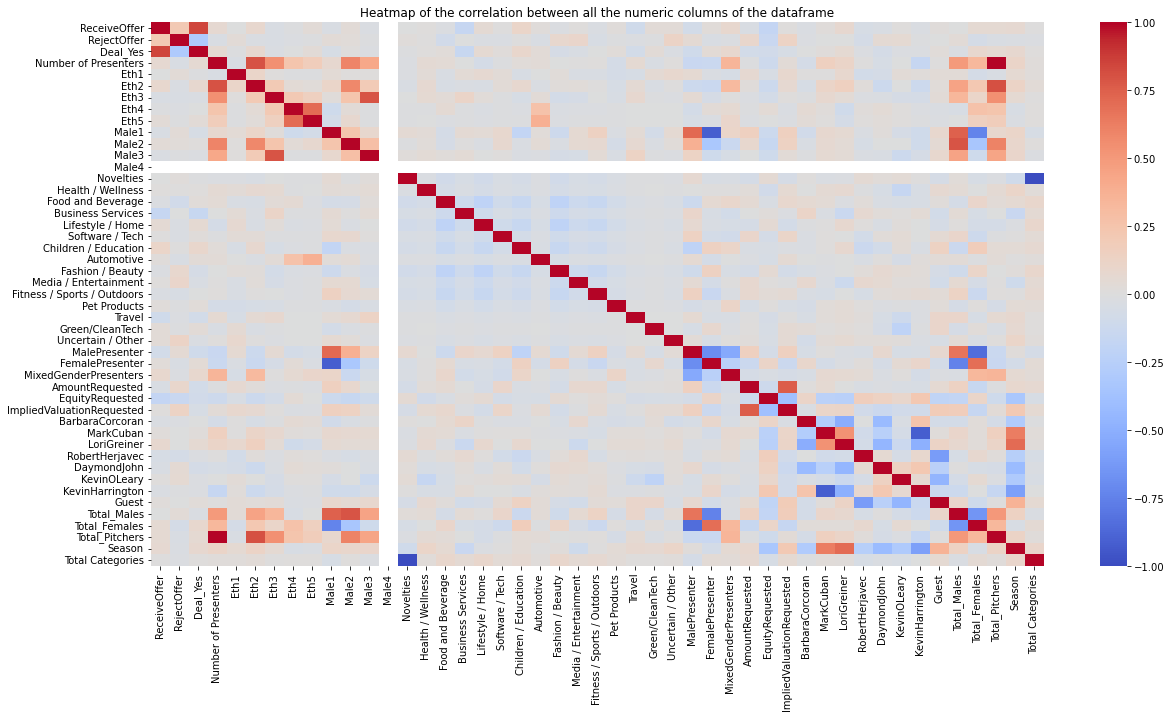

In [298]:
# Plotting the Heatmap of the correlation between all the numeric columns of the dataframe
plt.figure(figsize=(20,10))
sns.heatmap(data=df2.corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all the numeric columns of the dataframe')
plt.show();

In [128]:
df2[pd.isnull(df2['Region'])==True][['AmountRequested','EquityRequested','Region','Deal_Yes']]

,AmountRequested,EquityRequested,Region,Deal_Yes
334,200000.0,0.200,NaN,1
335,200000.0,0.125,NaN,1
336,100000.0,0.150,NaN,0
337,1000000.0,0.035,NaN,0
338,50000.0,0.100,NaN,1
...,...,...,...,...
403,1000000.0,0.076,NaN,0
405,500000.0,0.200,NaN,0
534,500000.0,0.100,NaN,0
535,300000.0,0.200,NaN,1


In [129]:
sectors

['Health / Wellness',
 'Food and Beverage',
 'Business Services',
 'Lifestyle / Home',
 'Software / Tech',
 'Children / Education',
 'Automotive',
 'Fashion / Beauty',
 'Media / Entertainment',
 'Fitness / Sports / Outdoors',
 'Pet Products',
 'Travel',
 'Green/CleanTech',
 'Uncertain / Other']

### Let's see which state is the dominant player ine each business sectors

In [130]:
for i in sectors:
    print(f"{i}---> {df2[df2[i]==1]['CompanyState'].value_counts().head(1)}")
    print()

Health / Wellness---> CA    3
Name: CompanyState, dtype: int64

Food and Beverage---> CA    18
Name: CompanyState, dtype: int64

Business Services---> CA    9
Name: CompanyState, dtype: int64

Lifestyle / Home---> CA    25
Name: CompanyState, dtype: int64

Software / Tech---> CA    3
Name: CompanyState, dtype: int64

Children / Education---> CA    9
Name: CompanyState, dtype: int64

Automotive---> IL    2
Name: CompanyState, dtype: int64

Fashion / Beauty---> CA    19
Name: CompanyState, dtype: int64

Media / Entertainment---> CA    13
Name: CompanyState, dtype: int64

Fitness / Sports / Outdoors---> CA    14
Name: CompanyState, dtype: int64

Pet Products---> CA    4
Name: CompanyState, dtype: int64

Travel---> NY    1
Name: CompanyState, dtype: int64

Green/CleanTech---> CA    1
Name: CompanyState, dtype: int64

Uncertain / Other---> NY    1
Name: CompanyState, dtype: int64



### We notice that except 3 sectors, all the other sectors are dominated by CA

In [131]:
df2_missing = df2[(pd.isnull(df2['CompanyState'])==True)]

In [132]:
for i in sectors:
    print(i,end='\n')
    print(df2_missing[i].sum())

Health / Wellness
2
Food and Beverage
17
Business Services
0
Lifestyle / Home
12
Software / Tech
7
Children / Education
6
Automotive
0
Fashion / Beauty
13
Media / Entertainment
1
Fitness / Sports / Outdoors
9
Pet Products
2
Travel
1
Green/CleanTech
0
Uncertain / Other
3


### Let's fill in all the missing values with CA as it is dominating in almost all the sectors

In [133]:
# Creating a function to replace nan values with 'CA'
def state_filler(x):
    if pd.isnull(x):
        return 'CA'
    else:
        return x

In [134]:
df2['CompanyState'] = df2['CompanyState'].apply(lambda x: state_filler(x)) # implementing the above created function

In [135]:
df2['CompanyState'].value_counts() # value count of each state

CA        196
NY         43
FL         38
TX         38
GA         19
MA         18
IL         17
CO         17
NC         14
UT         13
PA         13
OH         12
OR         10
AZ         10
WA          9
NJ          7
VA          7
NV          6
MI          6
IN          5
HI          4
CT          4
MO          3
DC          3
SC          3
TN          3
MD          3
VT          3
LA          2
WI          2
MS          2
MN          2
AL          2
ID          2
RI          2
OK          2
KS          2
NH          1
NE          1
MT          1
AR          1
DE          1
AK          1
KY          1
IA          1
Canada      1
Name: CompanyState, dtype: int64

In [136]:
df2['CompanyState'].isna().sum() # no nulls

0

### Let's see the highest business sector for each region

In [212]:
regions = []
reg_sec = []
reg_success_ratio = []
for i in df2['Region'].unique():
    for j in sectors:
        regions.append(i)
        reg_sec.append(j)
        try:
            
            reg_success_ratio.append(len(df2[(df2['Region']==i) & (df2[j]==1) & (df2['Deal_Yes']==1)] )/ len(df2[(df2['Region']==i) & (df2[j]==1)]))
        except:
            reg_success_ratio.append(np.nan)

In [216]:
region_product_df = pd.DataFrame({'Region': regions , 'Business Sector': reg_sec , 'Success Ratio': reg_success_ratio})
region_product_df

,Region,Business Sector,Success Ratio
0,South Atlantic,Health / Wellness,0.666667
1,South Atlantic,Food and Beverage,0.454545
2,South Atlantic,Business Services,0.333333
3,South Atlantic,Lifestyle / Home,0.875000
4,South Atlantic,Software / Tech,0.666667
...,...,...,...
149,Canada,Fitness / Sports / Outdoors,NaN
150,Canada,Pet Products,NaN
151,Canada,Travel,NaN
152,Canada,Green/CleanTech,NaN


In [225]:
region_product_df.dropna(inplace=True)

In [227]:
region_product_df = region_product_df[region_product_df['Success Ratio'] > 0]

In [246]:
imp_business_sectors

array(['Food and Beverage', 'Lifestyle / Home', 'Software / Tech',
       'Children / Education', 'Fashion / Beauty',
       'Media / Entertainment', 'Fitness / Sports / Outdoors'],
      dtype=object)

In [247]:
region_product_df_2 = region_product_df[ (region_product_df['Business Sector']== 'Food and Beverage') | (region_product_df['Business Sector']== 'Lifestyle / Home') 
                                        | (region_product_df['Business Sector']== 'Software / Tech') | (region_product_df['Business Sector']== 'Children / Education')
                                       | (region_product_df['Business Sector']=='Fashion / Beauty') | (region_product_df['Business Sector']=='Media / Entertainment')
                                       | (region_product_df['Business Sector']=='Fitness / Sports / Outdoors')]

In [255]:
region_product_df_2

,Region,Business Sector,Success Ratio
1,South Atlantic,Food and Beverage,0.454545
3,South Atlantic,Lifestyle / Home,0.875000
4,South Atlantic,Software / Tech,0.666667
5,South Atlantic,Children / Education,0.500000
7,South Atlantic,Fashion / Beauty,0.588235
8,South Atlantic,Media / Entertainment,0.444444
9,South Atlantic,Fitness / Sports / Outdoors,0.600000
15,Mid-Atlantic,Food and Beverage,0.666667
17,Mid-Atlantic,Lifestyle / Home,0.666667
19,Mid-Atlantic,Children / Education,0.600000


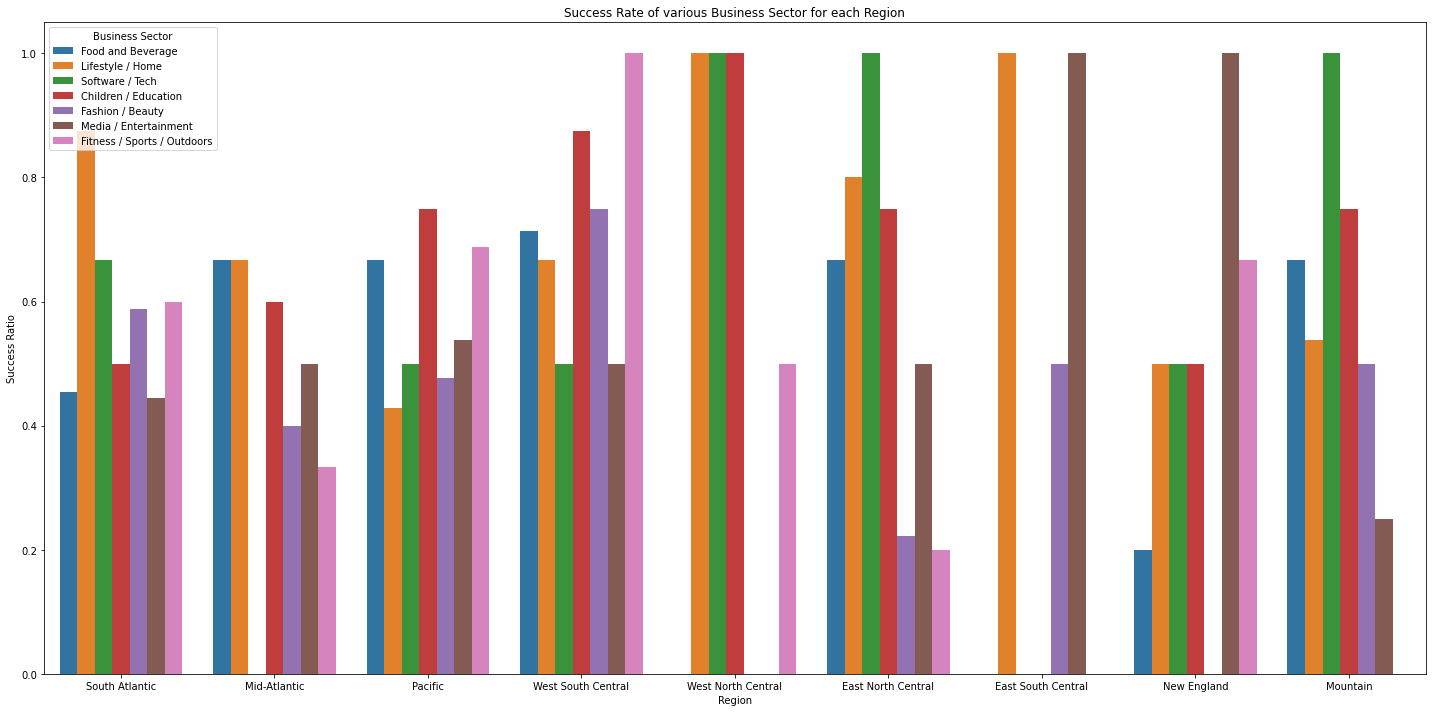

In [263]:
plt.figure(figsize=(20,10))
sns.barplot(data=region_product_df_2,x='Region',y='Success Ratio',hue='Business Sector')
plt.title('Success Rate of various Business Sector for each Region')
plt.tight_layout()
plt.show();

In [ ]:
df2_success[df2_success['Region']==i]['CompanyState'].value_counts()

In [269]:
df2_success.groupby(['Region','CompanyState']).count()['Deal_Yes']

Region              CompanyState
East North Central  IL              11
                    IN               1
                    MI               2
                    OH               8
East South Central  AL               1
                    KY               1
                    MS               1
                    TN               1
Mid-Atlantic        NJ               7
                    NY              17
                    PA               9
Mountain            AZ               5
                    CO              10
                    NV               2
                    UT              10
New England         CT               2
                    MA               6
                    NH               1
                    RI               1
                    VT               1
Pacific             CA              66
                    HI               1
                    OR               5
                    WA               8
South Atlantic      DE         

### Top states in each Region in terms of success in getting a deal at Shark Tank:
1) East North Central = IL
2) East South Central = All states are equal (AL, KY, MS and TN)
3) Mid-Atlantic = NY
4) Mountain = CO
5) New England = MA
6) Pacific = CA
7) South Atlantic = FL
8) West North Central = MO
9) West South Central = TX

### In almost all the regions Software/Tech turns out to have highest Success Ratio

In [137]:
#df2.to_csv('Partially_processed.csv')

## Let's see if there are any anomalies in 'Season', i.e., checking whether if there was any season which accepted or rejected dispropotionately high number of deals.

In [138]:
df2['Season'].value_counts() # checking the value counts of samples belonging to each season

7    87
5    83
6    78
4    71
8    65
9    65
1    39
3    38
2    25
Name: Season, dtype: int64

In [139]:
df2_success['Season'].value_counts() # checking the value counts of samples belonging to each season for all the successful deals

7    49
5    43
6    41
9    41
8    39
4    34
3    20
1    19
2    15
Name: Season, dtype: int64

## Success Ratio of each Season

In [140]:
# Checking the success rate of each season
pd.Series(100 * df2_success.groupby('Season').count()['Deal_Yes']/df2.groupby('Season').count()['Deal_Yes']).sort_values(ascending=False)

Season
9    63.076923
2    60.000000
8    60.000000
7    56.321839
3    52.631579
6    52.564103
5    51.807229
1    48.717949
4    47.887324
Name: Deal_Yes, dtype: float64

## Recent Seasons have relatively higher Success Rate.

## Let's see the Amount Requested per Season

<AxesSubplot:xlabel='Season', ylabel='AmountRequested'>

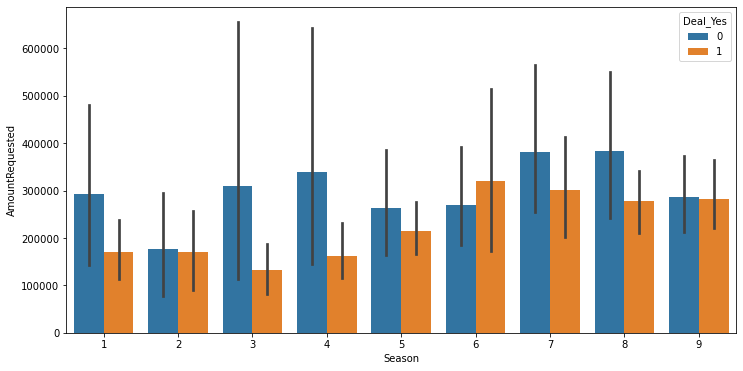

In [141]:
# Plotting the graph of Season vs Amount Requested 
plt.figure(figsize=(12,6))
sns.barplot(data=df2,x='Season',y='AmountRequested',hue='Deal_Yes')

### In Season 6, the Amount Requested by successful deal is higher than those of unsuccessful deals (which is an example of opposite trend). In Season 9, the Amount Requested by successful deal is almost the same as that of unsuccessful deals.

### Let's see if the product belonged to multiple domain then it has an advantage over other sole category product

In [142]:
# Creating a column which shows whether a product belongs to multiple domains or not. For this, we added all the columns of various business sectors (since they were all binary 0 and 1)
df2['Total Categories'] = df2['Health / Wellness'] +  df2['Food and Beverage'] + df2[ 'Business Services'] + df2['Lifestyle / Home'] + df2['Software / Tech'] + df2['Children / Education'] + df2['Automotive'] + df2['Fashion / Beauty'] + df2['Media / Entertainment'] + df2['Fitness / Sports / Outdoors'] + df2['Pet Products'] + df2['Travel'] + df2['Green/CleanTech']  + df2['Uncertain / Other']

In [143]:
df2['Total Categories'].value_counts() # checking the value counts of products which didn't fall in any business domain segmented by Deal_Yes

1    530
0     21
Name: Total Categories, dtype: int64

### All product belonged to only 1 specific category. However, there are some products which don't belong to any of the above mentioned domains

In [144]:
df2[df2['Total Categories']==0]['Deal_Yes'].value_counts() # checking the number of product which didn't fall in any business domain

1    11
0    10
Name: Deal_Yes, dtype: int64

## More than half of the products which did not belong to any domain was a success!!!

In [ ]:
df2[df2['Total Categories']==0][sectors] # checking the number of product which didn't fall in any business domain

,Health / Wellness,Food and Beverage,Business Services,Lifestyle / Home,Software / Tech,Children / Education,Automotive,Fashion / Beauty,Media / Entertainment,Fitness / Sports / Outdoors,Pet Products,Travel,Green/CleanTech,Uncertain / Other
34,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 11 deals were made for those products which didn't fall into any of the following business categeories:
'Health / Wellness', 'Food and Beverage','Business Services', 'Lifestyle / Home', 'Software / Tech', 'Children / Education', 'Automotive', 'Fashion / Beauty', 'Media / Entertainment', 'Fitness / Sports /Outdoors', 'Pet Products', 'Travel', 'Green/CleanTech', 'Uncertain / Other'

## Let's see success ratio of each state which had number of presenters more than the mean number of presenters

In [282]:
df2['CompanyState'].value_counts()[df2['CompanyState'].value_counts() >  df2['CompanyState'].value_counts().values.mean()+1] # slicing off those state which had more than the mean of number of presenters

CA    196
NY     43
FL     38
TX     38
GA     19
MA     18
IL     17
CO     17
NC     14
UT     13
PA     13
Name: CompanyState, dtype: int64

In [286]:
# slicing off those state which had more than the mean of number of presenters for those samples which made the deal
df2_success['CompanyState'].value_counts()[df2_success['CompanyState'].value_counts() >  df2_success['CompanyState'].value_counts().values.mean()+1] 

CA    66
TX    26
FL    24
NY    17
IL    11
UT    10
CO    10
GA    10
PA     9
WA     8
OH     8
Name: CompanyState, dtype: int64

In [289]:
# Calculating the success ratio
pd.Series(100 * df2_success['CompanyState'].value_counts()[df2_success['CompanyState'].value_counts() >  df2_success['CompanyState'].value_counts().values.mean()+1] / df2['CompanyState'].value_counts()[df2['CompanyState'].value_counts() >  df2['CompanyState'].value_counts().values.mean()+1]).dropna().sort_values(ascending=False)

UT    76.923077
PA    69.230769
TX    68.421053
IL    64.705882
FL    63.157895
CO    58.823529
GA    52.631579
NY    39.534884
CA    33.673469
Name: CompanyState, dtype: float64

### This shows states like CA, NY which have a high number of presenters also witnessed a high failure rate. Whereas states like UT, PA which have relatively less number of presenters, outperformed CA, NY by a large margin.

## How to get a deal in Shark Tank?
1) Presenters: 2 (go with either both Females OR 1 Male + 1 Female)
2) If you want you can present some 'Novelty items', but that won't make a huge difference which can solely get you a deal.
3) Focus on business sectors like Children/Education (recommended 'Ed Fin tech'), Lifestyle/Home, Food Beverage and Fitness/Sports/Outdoors and make good use of Software Tech. Try to blend tech into your desired stream. Tech plays crucial part in scaling your business.
4) If your business is located in a state with high success ratio (top player in every Region), then this increases your chances of getting a deal. States recommended TX, IL, FL and CO.